<a href="https://colab.research.google.com/github/nicklausmillican/ISLR_R/blob/main/ISLR_R_Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4

## Conceptual

### Question 1
Using a little bit of algebra, prove that (4.2)
$$p(X) = \frac{e^{X\beta}}{1 + e^{X\beta}}$$
is equivalent to (4.3).
$$\frac{p(X)}{1-p(X)} = e^{X\beta}$$

(NOTE: The book uses slightly different exponents, $\beta_0 + \beta_1 X$, but use this abbreviated version for ease.)

In other words, the logistic function representation and logit representation for the logistic regression model are equivalent.

#### Answer
Let's start with the definition of odds.  For ease, I'll use $p$ instead of $p(X)$.

$$odds = \frac{p}{1-p}$$

The logistic function is the *log odds*, which is equal to our linear model.

$$log odds = log(\frac{p}{1-p}) = X\beta$$.

We can retrieve equation (4.3) by exponentiating both sides

$$e^{log(\frac{p}{1-p})} = \frac{p}{1-p} = e^{X\beta}$$

Now we must solve for $p$ to get equation (4.2).

$$p = e^{X\beta}(1-p) = e^{X\beta} - pe^{X\beta} \rightarrow$$

$$p + pe^{X\beta} = p(1 + X\beta) \rightarrow$$

$$p = \frac{e^{X\beta}}{1 + e^{X\beta}}$$



### Question 2
It was stated in the text that classifying an observation to the class for which (4.17)

$$p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2 \pi} \sigma} exp(-\frac{1}{2 \sigma^2}(x-\mu_k)^2)}{\sum_{l=1}^K \pi_l \frac{1}{\sqrt{2 \pi} \sigma} exp(-\frac{1}{2 \sigma^2}(x-\mu_l)^2)}$$

is largest is equivalent to classifying an observation to the class for which (4.18)

$$\delta_k(x) = x \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} + log(\pi_k)$$

is largest. Prove that this is the case. In other words, under the assumption that the observations in the kth class are drawn from a $N(µ_k, σ^2)$ distribution, the Bayes classifier assigns an observation to the class for which the discriminant function is maximized.

#### Answer
The way I'm going to do this is to show that $\delta_k$ is proportional to the log of the numerator of Bayes' Theorem (when the likelihood is a normal distribution).  Since a log a monotonic transformation, the max of the log-transformed variable corresponds to the max of the untransformed variable.  In Bayes', the value $k$ that gives the largest numerator is the most probable; the denominator cancels out since every expression across all $K$ values uses the same denominator.  Thus, the greatest $\delta_k$ corresponds to most probable value.

Let's start by simplifying the notation.

$$p_k(x) = \frac{\pi_k \times f_k(x)}{M}$$

where $\pi_k$ is the prior probability for $k$, $f_k(x)$ is the normally-distributed likelihood

$$f_k(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{1}{2 \sigma^2}(x-\mu_k)^2)$$

and $M$ is the marginal distribution

$$M = \sum_{l=1}^K \pi_l \times f_l(x) = {\sum_{l=1}^K \pi_l \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{1}{2 \sigma^2}(x-\mu_l)^2)}$$.

If we then take the log of $p_k(x)$, we get

$$ln[p_k(X)] = ln[\pi_k] + ln[f_k(x)] - ln[M]$$.

Now I'm going to expand $ln[f_k(x)]$.

$$ln[p_k(X)] = ln[\pi_k] + ln[\frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{1}{2 \sigma^2}(x-\mu_k)^2)] - ln[M]$$

$$= ln[\pi_k] + ln[\frac{1}{\sqrt{2 \pi \sigma^2}}] -\frac{1}{2 \sigma^2}(x-\mu_k)^2) - ln[M]$$

$$= ln[\pi_k] + ln[(2 \pi \sigma^2)^{-1/2}] -\frac{1}{2 \sigma^2}(x-\mu_k)^2) - ln[M]$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma^2] + \frac{(x- \mu_k)^2}{\sigma^2}) - ln[M])$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma^2] + \frac{x^2}{\sigma^2} - \frac{2 x \mu_k}{\sigma^2} + \frac{\mu_k^2}{\sigma^2}) - ln[M])$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma^2]) - \frac{x^2}{2 \sigma^2} + \frac{x \mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} - ln[M])$$

We're in the home stretch.  If we look at our expression, we recognize a few terms that are shared with $\delta_k$; namely, those that reference $k$.  This should make sense, only values that depend on the $k^{th}$ option can distinguish among $\delta$ expressions.  Thus, we can drop all terms without reference to $k$, and we get $\delta_k$.

$$\delta_k = ln[\pi_k] + \frac{x \mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2}$$

$$= x \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} + log(\pi_k)$$.

### Question 3
This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class specific mean vector and a class specific covariance matrix. We consider the simple case where $p = 1$; i.e. there is only one feature.

Suppose that we have $K$ classes, and that if an observation belongs to the $k^{th}$ class then $X$ comes from a one-dimensional normal distribution, $X ∼ N(µ_k, σ^2_k)$. Recall that the density function for the one-dimensional normal distribution is given in (4.16)

$$f_k(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{1}{2 \sigma^2}(x-\mu_k)^2)$$

Prove that in this case, the Bayes classifier is not linear. Argue that it is in fact quadratic.

*Hint: For this problem, you should follow the arguments laid out in Section 4.4.1, but without making the assumption that $σ^2_1 = ... = σ^2_K$.*

#### Answer
In the solution to Question 2 (above), we found $\delta_k$ to be proportional to the likelihood of Bayes' theorem when the likelihood is normally distributed.  In that derivation, we assumed that $σ^2_1 = ... = σ^2_K$, and this yielded the $\delta(x)$ function

$$\delta_k(x) = x \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} + log(\pi_k)$$.

We say that this $\delta(x)$ is "linear" in $x$ since the highest degree of $x$ is 1, $x=x^1$.  If there was an $x^2$ in there, we'd say that $\delta(x)$ was "quadratic" in $x$; and if an $x^3$, we'd say "cubic"...and so on.

Here, we're told that if do NOT assume $σ^2_1 = ... = σ^2_K$, then $\delta(x)$ is quadratic in $x$.  Let's try to derive this; we'll use the same steps as we did for Question 2.

Start again by simplifying the notation.

$$p_k(x) = \frac{\pi_k \times f_k(x)}{M}$$

where $\pi_k$ is the prior probability for $k$, $f_k(x)$ is the normally-distributed likelihood

$$f_k(x) = \frac{1}{\sqrt{2 \pi \sigma_k^2}} exp(-\frac{1}{2 \sigma_k^2}(x-\mu_k)^2)$$

and $M$ is the marginal distribution

$$M = \sum_{l=1}^K \pi_l \times f_l(x) = {\sum_{l=1}^K \pi_l \frac{1}{\sqrt{2 \pi \sigma_l^2}} exp(-\frac{1}{2 \sigma_l^2}(x-\mu_l)^2)}$$.

This time, we are sure to identify the variance of the $k^{th}$ and $l^{th}$ categories by $\sigma_k^2$ and $\sigma_l^2$.

If we then take the log of $p_k(x)$, expanding the term for $f_k(x)$, we get

$$ln[p_k(x)] = ln[\pi_k] + ln[\frac{1}{\sqrt{2 \pi \sigma_k^2}} exp(-\frac{1}{2 \sigma_k^2}(x-\mu_k)^2)] - ln[M]$$

$$= ln[\pi_k] + ln[\frac{1}{\sqrt{2 \pi \sigma_k^2}}] -\frac{1}{2 \sigma_k^2}(x-\mu_k)^2) - ln[M]$$

$$= ln[\pi_k] + ln[(2 \pi \sigma_k^2)^{-1/2}] -\frac{1}{2 \sigma_k^2}(x-\mu_k)^2) - ln[M]$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma_k^2] + \frac{(x- \mu_k)^2}{\sigma_k^2}) - ln[M])$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma_k^2] + \frac{x^2}{\sigma_k^2} - \frac{2 x \mu_k}{\sigma_k^2} + \frac{\mu_k^2}{\sigma_k^2}) - ln[M])$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma_k^2]) - \frac{x^2}{2 \sigma_k^2} + \frac{x \mu_k}{\sigma_k^2} - \frac{\mu_k^2}{2 \sigma_k^2} - ln[M])$$

Now we're basically done.  Let's compare the expression we just derived, for QDA (with $\sigma_k^2$), to the expression we previously derived, for LDA (with $\sigma^2$, instead).

$$ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma_k^2]) - \frac{x^2}{2 \sigma_k^2} + \frac{x \mu_k}{\sigma_k^2} - \frac{\mu_k^2}{2 \sigma_k^2} - ln[M])$$

$$vs$$

$$ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma^2]) - \frac{x^2}{2 \sigma^2} + \frac{x \mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} - ln[M])$$

When we derived the $\delta(x)$ expression for LDA, we discarded the terms of $ln[p_k(X)]$ that did not reference $x$, leaving

$$\delta_k^{LDA}(x) = ln[\pi_k] + \frac{x \mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2}$$

Let us do the same for QDA.  We now see that every term except $ln[M]$ references $k$, including $\frac{x^2}{2 \sigma_k^2}$, thus making the $\delta(X)$ function for QDA quadratic in $x$.

$$\delta_k^{QDA}(x) = ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma_k^2]) - \frac{x^2}{2 \sigma_k^2} + \frac{x \mu_k}{\sigma_k^2} - \frac{\mu_k^2}{2 \sigma_k^2}$$

##### Bonus
The LDA decision boundary for categories $a$ and $b$ occurs when $\delta_a = \delta_b$.  Importantly, $\delta_k$ for LDA assumed that each $k \in K$ had the same variance $σ^2_1 = ... = σ^2_K.$.  Under this assumption, we found that the Bayes' decision boundary occurs when

$$x \frac{\mu_a}{\sigma^2} - \frac{\mu_a^2}{2 \sigma^2} + log(\pi_a)
= x \frac{\mu_b}{\sigma^2} - \frac{\mu_b^2}{2 \sigma^2} + log(\pi_b)$$

$$\rightarrow x \frac{\mu_a}{\sigma^2} - x \frac{\mu_b}{\sigma^2} + log(\pi_a)
= \frac{\mu_a^2}{2 \sigma^2} - \frac{\mu_b^2}{2 \sigma^2} + log(\pi_b)$$

$$= \frac{x(\mu_a - \mu_b)}{\sigma^2} + log(\pi_a) = \frac{1}{2} \frac{\mu^2_a - \mu^2_b}{\sigma^2} + log(\pi_b)$$

$$\rightarrow 2x(\mu_a - \mu_b) + 2log(\pi_a)\sigma^2 = \mu^2_a - \mu^2_b + 2log(\pi_b)\sigma^2$$

$$\rightarrow x = \frac{\mu^2_a - \mu^2_b}{2(\mu_a - \mu_b)} + \frac{log(\pi_b / \pi_a)\sigma^2}{(\mu_a - \mu_b)}$$

If $\pi_a = \pi_b$, then this simplifies to

$$x = \frac{\mu^2_a - \mu^2_b}{2(\mu_a - \mu_b)}$$

But in quadratic discriminant analysis (QDA), we allow each category to have individual variances.  How will this change our derivation for the decision boundary?

$$ln[\pi_a] - \frac{1}{2}(ln[2 \pi \sigma_a^2]) - \frac{x^2}{2 \sigma_a^2} + \frac{x \mu_a}{\sigma_a^2} - \frac{\mu_a^2}{2 \sigma_a^2}
= ln[\pi_b] - \frac{1}{2}(ln[2 \pi \sigma_b^2]) - \frac{x^2}{2 \sigma_b^2} + \frac{x \mu_b}{\sigma_b^2} - \frac{\mu_b^2}{2 \sigma_b^2}$$

$$\rightarrow ln[\pi_a] - ln[\pi_b] + \frac{1}{2}(ln[2 \pi \sigma_b^2]) - \frac{1}{2}(ln[2 \pi \sigma_a^2]) + \frac{x^2}{2 \sigma_b^2} - \frac{x^2}{2 \sigma_a^2} + \frac{x \mu_a}{\sigma_a^2} - \frac{x \mu_b}{\sigma_b^2} + \frac{\mu_b^2}{2 \sigma_b^2} - \frac{\mu_a^2}{2 \sigma_a^2} = 0$$

$$\rightarrow 2ln[\frac{\pi_a}{\pi_b}] + ln[\frac{\sigma^2_b}{\sigma^2_a}] + \frac{x^2}{\sigma_b^2} - \frac{x^2}{\sigma_a^2} + \frac{2x \mu_a}{\sigma_a^2} - \frac{2x \mu_b}{\sigma_b^2} + \frac{\mu_b^2}{\sigma_b^2} - \frac{\mu_a^2}{\sigma_a^2} = 0$$

$$\rightarrow ln[\frac{\pi^2_a \sigma^2_b}{\pi^2_b \sigma^2_a}] + x^2(\frac{\sigma^2_a - \sigma^2_b}{\sigma^2_a \sigma^2_b}) + x(\frac{2(\mu_a \sigma^2_b - \mu_b \sigma^2_a)}{\sigma^2_a \sigma^2_b}) + \frac{\mu^2_b \sigma^2_a - \mu^2_a \sigma^2_b}{\sigma^2_a \sigma^2_b} = 0$$

$$\rightarrow x^2(\frac{\sigma^2_a - \sigma^2_b}{\sigma^2_a \sigma^2_b}) + x(\frac{2(\mu_a \sigma^2_b - \mu_b \sigma^2_a)}{\sigma^2_a \sigma^2_b}) + (\frac{\mu^2_b \sigma^2_a - \mu^2_a \sigma^2_b}{\sigma^2_a \sigma^2_b} + ln[\frac{\pi^2_a \sigma^2_b}{\pi^2_b \sigma^2_a}]) = 0$$

$$\rightarrow Ax^2 + Bx + C = 0$$

Thus, we have a quadratic equation. In other words, our decision boundary is also quadratic in $x$ for QDA.  We can solve this with the quadratic formula:

$$x = \frac{-B \pm \sqrt{B^2 - 4AC}}{2A}$$

I won't solve that here; it's just an exercise in algebra.

#### Check out the Desmos Demo
I made a demo of this in Desmos.  You can check it out [here](https://www.desmos.com/calculator/qbdkdiuipt).

Start by noticing what happens with the priors are equal (in Desmos, $p_a = p_b$).  The LDA decision boundary is exactly where the two distributions meet.  As you move $p_a$ to become higher, $p_b$ gets lower and so the decision boundary encroaches on b's territory.

When the variances are equal (in Desmos, $s_a = s_b$), there is not QDA boundary.  Only when they are not equal do these emerge.  At the same time, the LDA boundary no longer intersects where a and b are equal (when $p_a = p_b$).

With just 1 predictor variable, the QDA boundaries are a little difficult to map to the behavior of the normal distributions.  Hopefully, a 2-predictor variable question will show up later.

### Question 4 ❗
When the number of features $p$ is large, there tends to be a deterioration in the performance of KNN and other *local* approaches that perform prediction using only observations that are *near* the test observation for which a prediction must be made. This phenomenon is known as the curse of *dimensionality*, and it ties into the fact that non-parametric approaches often perform poorly when $p$ is large. We will now investigate this curse.

>   (a) Suppose that we have a set of observations, each with measurements on $p = 1$ feature, $X$. We assume that $X$ is uniformly (evenly) distributed on [0, 1]. Associated with each observation is a response value. Suppose that we wish to predict a test observation’s response using only observations that are within 10% of the range of $X$ closest to that test observation. For instance, in order to predict the response for a test observation with $X = 0.6$, we will use observations in the range [0.55, 0.65]. On average, what fraction of the available observations will we use to make the prediction?

>   (b) Now suppose that we have a set of observations, each with measurements on $p = 2$ features, $X_1$ and $X_2$. We assume that $(X_1, X_2)$ are uniformly distributed on [0, 1] × [0, 1]. We wish to predict a test observation’s response using only observations that are within 10% of the range of $X_1$ and within 10% of the range of $X_2$ closest to that test observation. For instance, in order to predict the response for a test observation with $X_1 = 0.6$ and $X_2 = 0.35$, we will use observations in the range [0.55, 0.65] for $X_1$ and in the range [0.3, 0.4] for $X_2$. On average, what fraction of the available observations will we use to make the prediction?

>   (c) Now suppose that we have a set of observations on $p = 100$ features. Again the observations are uniformly distributed on each feature, and again each feature ranges in value from 0 to 1. We wish to predict a test observation’s response using observations within the 10% of each feature’s range that is closest to that test observation. What fraction of the available observations will we use to make the prediction?

>   (d) Using your answers to parts (a)–(c), argue that a drawback of KNN when $p$ is large is that there are very few training observations “near” any given test observation.

>   (e) Now suppose that we wish to make a prediction for a test observation by creating a p-dimensional hypercube centered around the test observation that contains, on average, 10% of the training observations. For $p = 1, 2, 100$, what is the length of each side of the hypercube? Comment on your answer.

>   *Note: A hypercube is a generalization of a cube to an arbitrary number of dimensions. When $p = 1$, a hypercube is simply a line segment, when $p = 2$ it is a square, and when $p = 100$ it is a 100-dimensional cube.*

#### Answers

##### Answer to a
The answer to the first part is stright forward.  Let's call the proportion of $X$ we will use $r_X$.  Here, $r_{x} = 0.10$, or 10%.  Since $x$ represents all of the data, then the proportion of data available is also 10%.  Let's call the proportion of data available $a_X$; so here, $a_X = r_X$.

>In the example, we are looking for $0.55 \ge x \ge 0.65$, which is $r_x=0.10$ of the data.  Since $x$ is the only data, we have $a_x = r_x = 0.10$ of observations available.  That means that if we have $n=100$ observations, then on average, 10 will be between 0.55 and 0.65.  We can get some intuition for this by simulation.

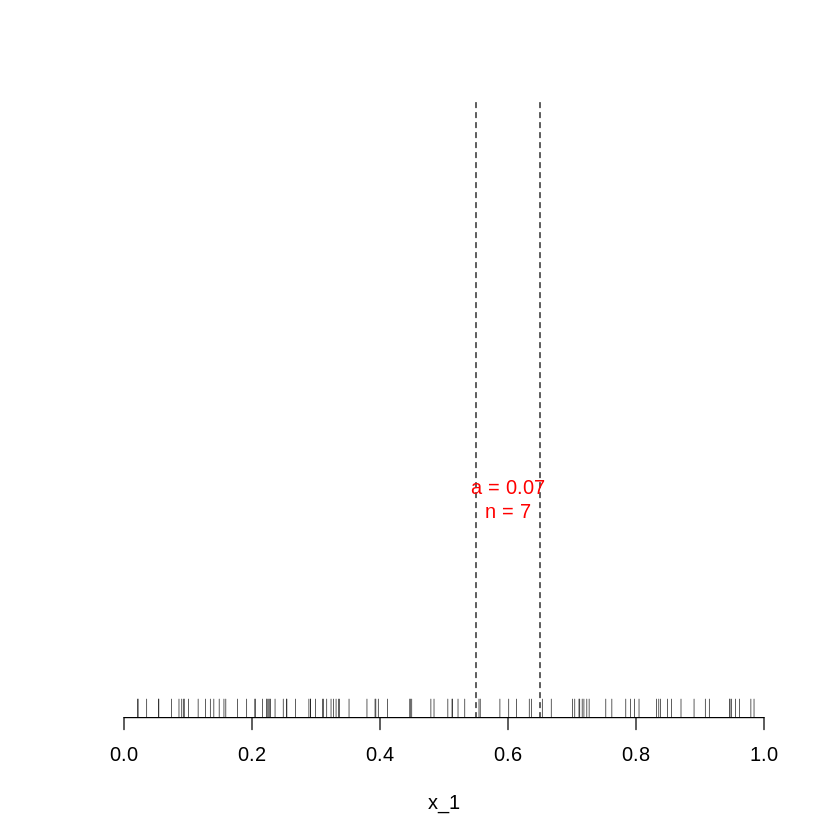

In [ ]:
n <- 100
r <- 0.1
x <- runif(n=n, min=0, max=1)
a_1.est <- sum(x > 0.55 & x < 0.65)/n
na_1.est <- a_1.est*n

plot(x, type="n", bty="n", xlim=c(0,1), yaxt="n", ylab="", xlab="x_1")
rug(x)
#abline(v=0.6)
abline(v=0.55, lty=2)
abline(v=0.65, lty=2)
text(paste("a =", a_1.est), x=0.6, y=0.37, col="red")
text(paste("n =", na_1.est), x=0.6, y=0.33, col="red")

The little ticks along the x-axis are data points.  The interval between the dotted lines is the 10% interval between $x = 0.55$ an $x = 0.65$.  The text in that interval is the estimate for $a$.  Run this a few times.  You'll see that we get estimates for $a$ of around 10%, just as we reasoned above.

##### Answer to b
But what if we have two variables, $x_1$ and $x_2$.  Let's simulate first.

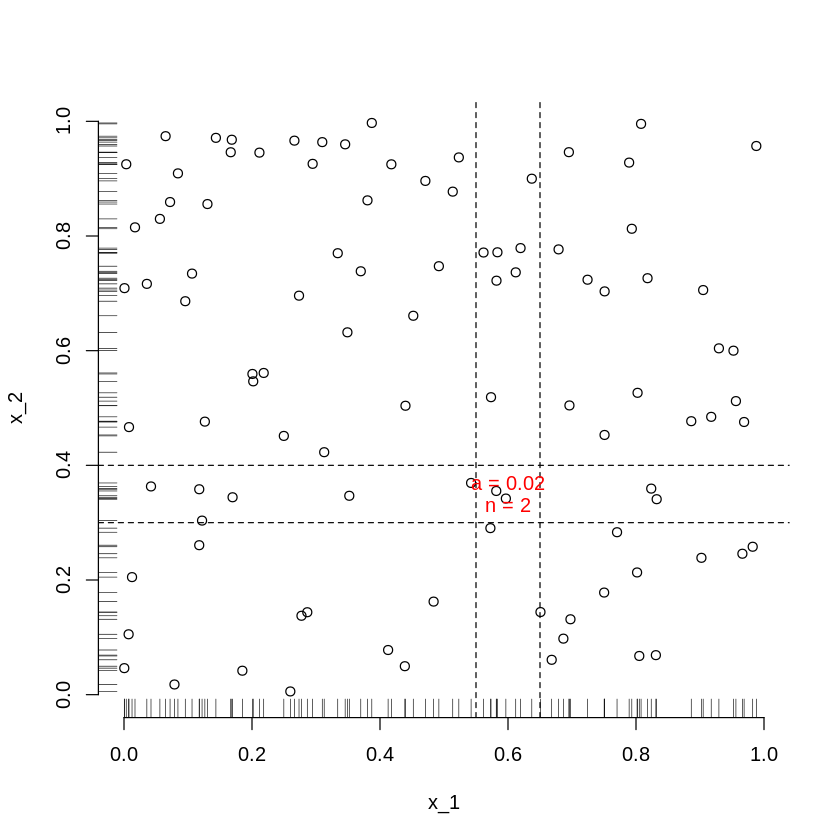

In [ ]:
n <- 100
x_1 <- runif(n=n, min=0, max=1)
x_2 <- runif(n=n, min=0, max=1)
r_1 <- 0.10
r_2 <- 0.10
a_2.est <- sum((x_1 > 0.55 & x_1 < 0.65) & (x_2 > 0.3 & x_2 < 0.4))/n
na_2.est <- a_2.est * n

plot(x_2 ~ x_1, bty="n", xlim=c(0,1), ylim=c(0,1), ylab="x_2", xlab="x_1")
rug(x_1, side=1)
rug(x_2, side=2)
#abline(v=0.6); abline(h=0.35)
abline(v=0.55, lty=2); abline(h=0.3, lty=2)
abline(v=0.65, lty=2); abline(h=0.4, lty=2)
text(paste("a =",a_2.est), x=0.6, y=0.37, col="red")
text(paste("n =",na_2.est), x=0.6, y=0.33, col="red")

Run this a few times and you'll get estimated $a$ values around 1%.  So when $p=1$, we get $a_1 = 0.10$; for $p=2$, we get $a_2 = 0.01$--which is $a_2 = 0.10 \times 0.10 = 0.10^2$.  This makes sense: with $x_1$, we get 10% of the observations; imposing a second restriction with $a_2$ and now we get 10% of the 10%.

This trend continues for an number of parameters $p$ for any proportion of data $r$:
$$a_p = r^p$$

##### Answer to c
If we extend to $p = 100$, keeping $r = 0.10$, we get $a_{100} = 0.10^{100}$, which is basically $0$.  This informs our answer to (d).

##### Answer to d
As $p$ gets large, there is an increasingly good chance that we will have few-to-no data with which to make good inferences.  The data become too sparse across the p-dimenions.

##### Answer to e
Since data becomes increasingly sparse as $p$ increases, we will need to increase the length of the sides our hypercube $l$ to capture the same $r$.

When we have $p=1$ dimensions, we can find $l$ as
$$l_p = r^p$$
such that when $r=0.10$,
$$l_1 = 0.10^1 = 0.10$$
As $p$ increases, data becomes sparse like $r^p$.  So to counteract this, we need to expand $l$ like $r^{1/p}$.  So if we look at $p=1$, $p=2$, ..., $p=100$,...
$$l_1 = r^{1/1} = 0.10^1 = 0.10$$
$$l_2 = r^{1/2} = 0.10^{1/2} = 0.32$$
$$l_3 = r^{1/3} = 0.10^{1/3} = 0.46$$
$$...$$
$$l_{100} = r^{1/100} = 0.10^{1/100} = 0.98$$
Notice that as $p$ increases, $l$ must expand towards the limits of the data.

Ultimately what we're doing by expanding $l$ with $p$ is trying to capture the same amount of data; we must expand $l$ because that data is now spread over more dimensions.  Let's look at a simulation.

We'll start by capturing $a_1 = 0.10$ of the data in $p=1$ dimension. This is the same as the first simulation we ran.

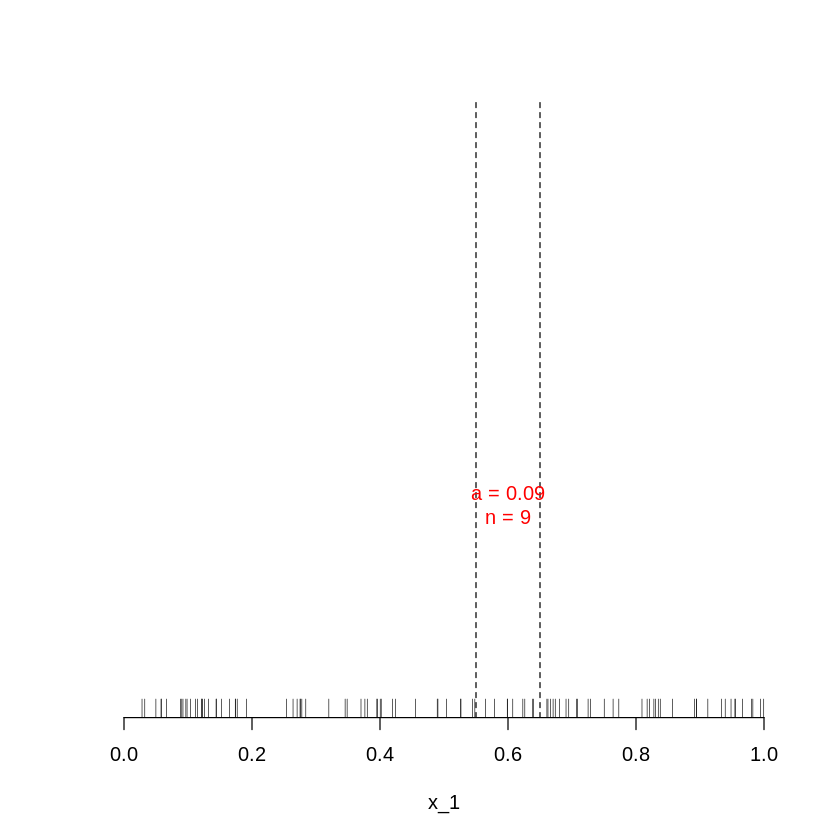

In [ ]:
n <- 100
r <- 0.1
x <- runif(n=n, min=0, max=1)
a_1.est <- sum(x > 0.55 & x < 0.65)/n
na_1.est <- a_1.est*n

plot(x, type="n", bty="n", xlim=c(0,1), yaxt="n", ylab="", xlab="x_1")
rug(x)
#abline(v=0.6)
abline(v=0.55, lty=2)
abline(v=0.65, lty=2)
text(paste("a =", a_1.est), x=0.6, y=0.37, col="red")
text(paste("n =", na_1.est), x=0.6, y=0.33, col="red")

Now let's expand this to 2 dimenions.  We already saw that doing this decreases $a_p$.

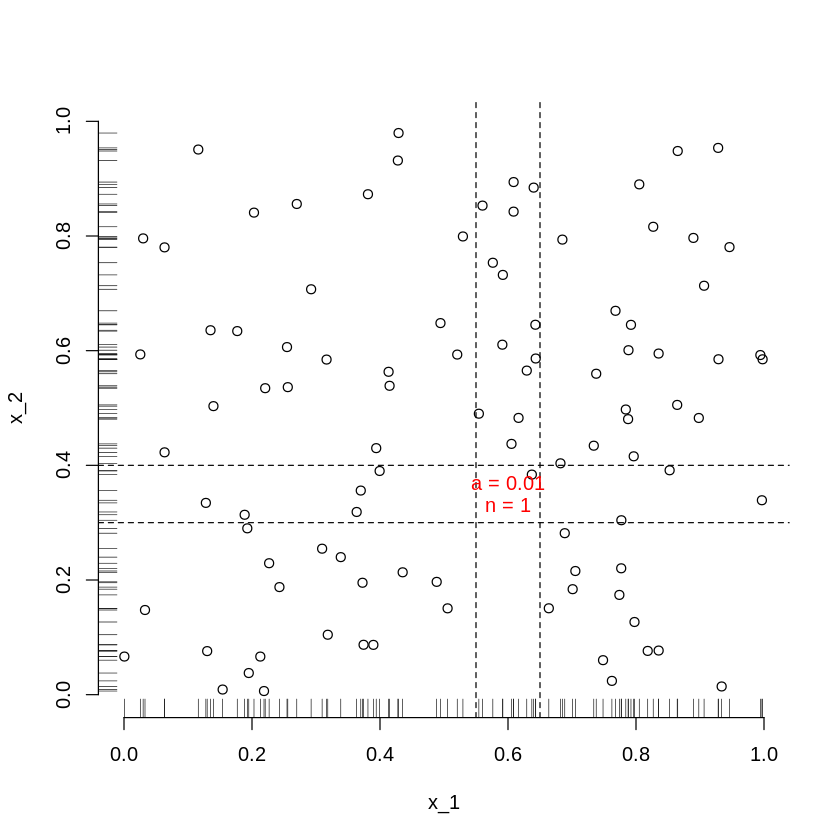

In [ ]:
n <- 100
x_1 <- runif(n=n, min=0, max=1)
x_2 <- runif(n=n, min=0, max=1)
r_1 <- 0.10
r_2 <- 0.10
a_2.est <- sum((x_1 > 0.55 & x_1 < 0.65) & (x_2 > 0.3 & x_2 < 0.4))/n
na_2.est <- a_2.est * n

plot(x_2 ~ x_1, bty="n", xlim=c(0,1), ylim=c(0,1), ylab="x_2", xlab="x_1")
rug(x_1, side=1)
rug(x_2, side=2)
#abline(v=0.6); abline(h=0.35)
abline(v=0.55, lty=2); abline(h=0.3, lty=2)
abline(v=0.65, lty=2); abline(h=0.4, lty=2)
text(paste("a =",a_2.est), x=0.6, y=0.37, col="red")
text(paste("n =",na_2.est), x=0.6, y=0.33, col="red")

Let's expand $l$ according to what we already calculated to see if we can capture the about the same amount of observations (10%).

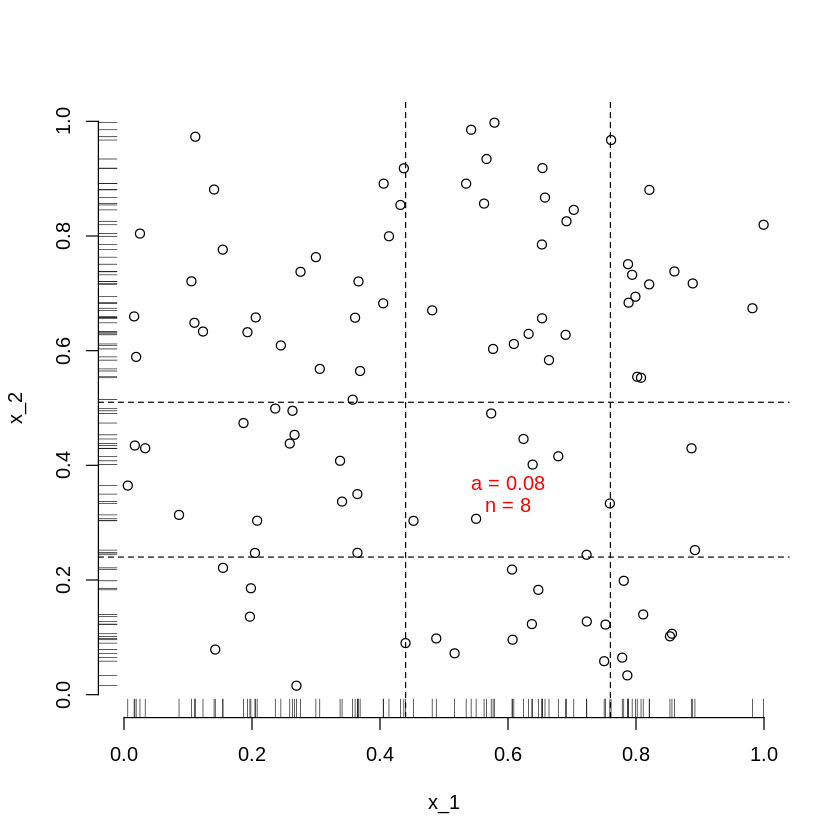

In [ ]:
n <- 100
x_1 <- runif(n=n, min=0, max=1)
x_2 <- runif(n=n, min=0, max=1)
r_1 <- 0.10
r_2 <- 0.10
a_2.est <- sum((x_1 > 0.44 & x_1 < 0.76) & (x_2 > 0.24 & x_2 < 0.51))/n
n_2.est <- a_2.est * n

plot(x_2 ~ x_1, bty="n", xlim=c(0,1), ylim=c(0,1), ylab="x_2", xlab="x_1")
rug(x_1, side=1)
rug(x_2, side=2)
#abline(v=0.6); abline(h=0.35)
abline(v=0.44, lty=2); abline(h=0.24, lty=2)
abline(v=0.76, lty=2); abline(h=0.51, lty=2)
text(paste("a =", a_2.est), x=0.6, y=0.37, col="red")
text(paste("n =", n_2.est), x=0.6, y=0.33, col="red")

But we go another way: rather than expand $l$, we could fill the same $l$ with more data.  

Say we have $n$ total observations in $p$ dimensions, of which $a_p = r^p$ are available.  This means that the total number of observations available is $na_p = nr^p$.  We also have another set of observations in $q$ dimensions such that the proportion available is $a_q = r^q$.  How many observations $m$ of the $q-dimensional$ data do wee need to get the same number of available observations as for the $p-dimensional$ data?

$$nr^p = mr^q$$
$$\rightarrow log(n) + p*log(r) = log(m) + q*log(r)$$
$$\rightarrow log(m) = log(n) + p*log(r) - q*log(r)$$
$$\rightarrow m = exp(log(m)) = exp(log(n) + p*log(r) - q*log(r))$$

So if $n=100$, $r=0.10$, $p=1$, and $q=2$, then plugging in the numbers means that we need $m=1000$ observations from the 2-dimensional data; a 10x increase. Let's simulate this.

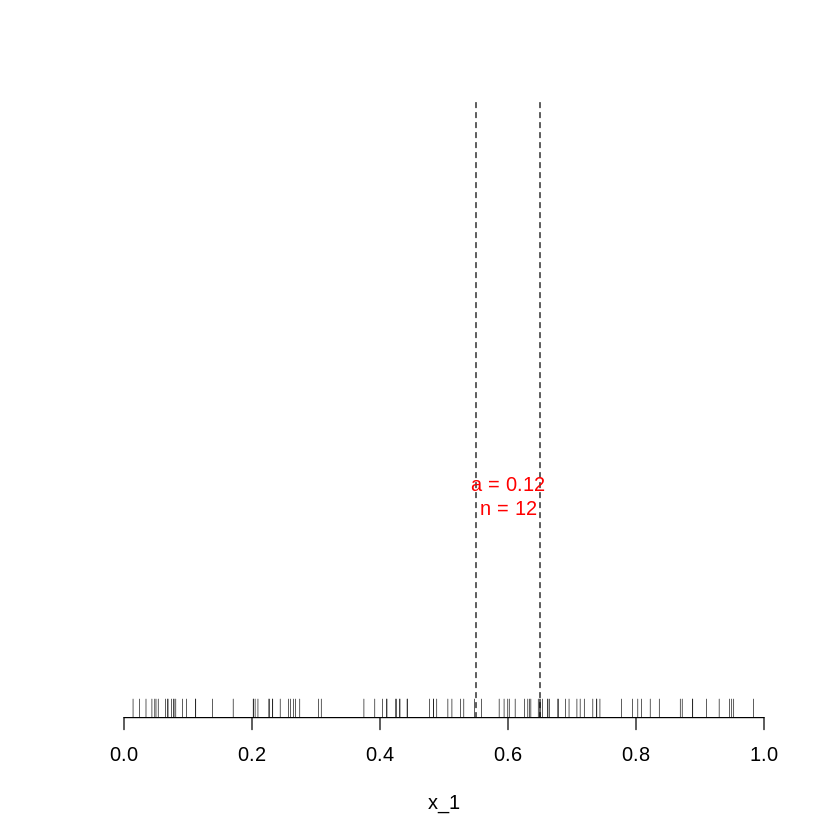

In [ ]:
n <- 100
r <- 0.1
x <- runif(n=n, min=0, max=1)
a_1.est <- sum(x > 0.55 & x < 0.65)/n
na_1.est <- a_1.est*n

plot(x, type="n", bty="n", xlim=c(0,1), yaxt="n", ylab="", xlab="x_1")
rug(x)
#abline(v=0.6)
abline(v=0.55, lty=2)
abline(v=0.65, lty=2)
text(paste("a =", a_1.est), x=0.6, y=0.37, col="red")
text(paste("n =", na_1.est), x=0.6, y=0.33, col="red")

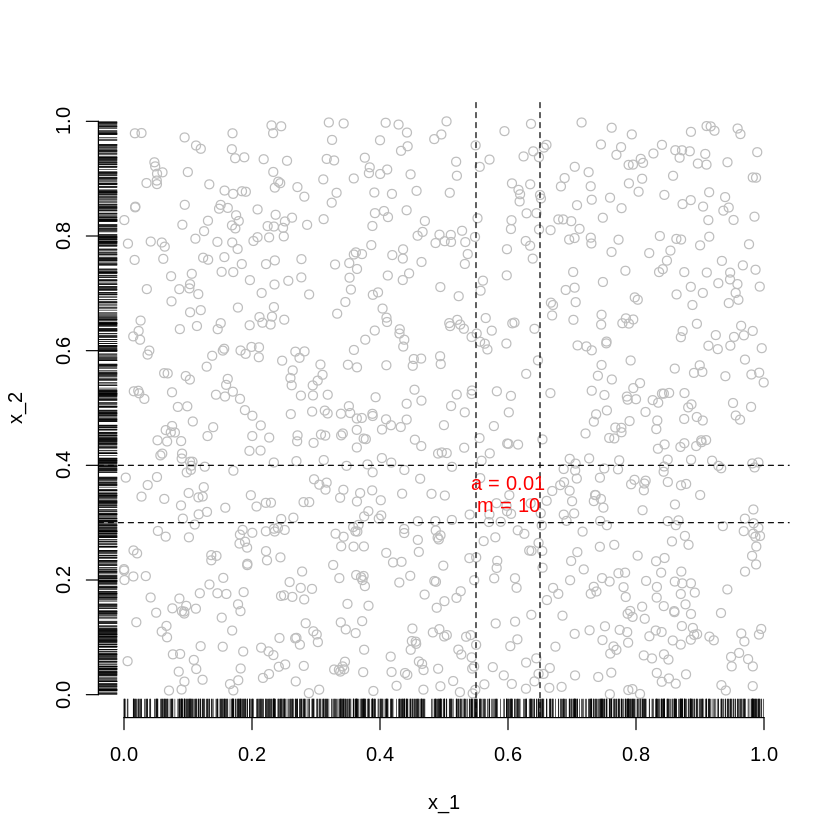

In [ ]:
m <- 1000
x_1 <- runif(n=m, min=0, max=1)
x_2 <- runif(n=m, min=0, max=1)
r_1 <- 0.10
r_2 <- 0.10
a_2.est <- sum((x_1 > 0.55 & x_1 < 0.65) & (x_2 > 0.3 & x_2 < 0.4))/m
m_2.est <- a_2.est * m

plot(x_2 ~ x_1, bty="n", xlim=c(0,1), ylim=c(0,1), ylab="x_2", xlab="x_1", col="grey")
rug(x_1, side=1)
rug(x_2, side=2)
#abline(v=0.6); abline(h=0.35)
abline(v=0.55, lty=2); abline(h=0.3, lty=2)
abline(v=0.65, lty=2); abline(h=0.4, lty=2)
text(paste("a =", a_2.est), x=0.6, y=0.37, col="red")
text(paste("m =", m_2.est), x=0.6, y=0.33, col="red")

### Question 5
We now examine the differences between LDA and QDA.

> (a) If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set?

> (b) If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?

> (c) In general, as the sample size n increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged? Why?

> (d) True or False: Even if the Bayes decision boundary for a given problem is linear, we will probably achieve a superior test error rate using QDA rather than LDA because QDA is flexible enough to model a linear decision boundary. Justify your answer.

#### Answer to a
***If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set?***

In general, we expect more-flexible methods to perform better on training data.  In this case, that means that we expect QDA to generally do better than LDA on the training data *even though* the Bayes' decision boundary is linear.  However, on the test data, overly-flexible models pay a penalty.  Thus, we should expect LDA to do better than QDA on the test set.

I think we should test this out with simulation.  First I'll make some data: two variables, both normal distributions with equal variance but different means.

In [ ]:
n <- 10
x1 <- rnorm(n=n, mean=-1, sd=1)
x2 <- rnorm(n=n, mean=1, sd=1)

We can see see what this data *should* look like by plotting the theoretical distributions.

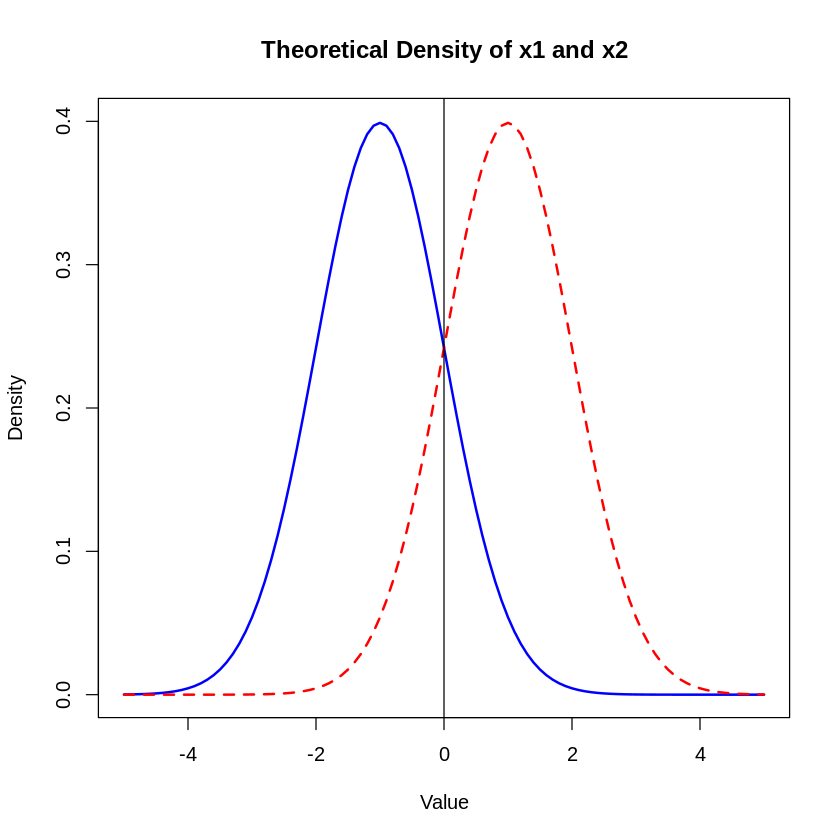

In [ ]:
density_x1 <- function(x) dnorm(x, mean = -1, sd = 1)
density_x2 <- function(x) dnorm(x, mean = 1, sd = 1)

curve(density_x1, from = -5, to = 5, col = "blue", lwd = 2, ylim = c(0, 0.4), ylab = "Density", xlab = "Value", main = "Theoretical Density of x1 and x2")
curve(density_x2, from = -5, to = 5, col = "red", lwd = 2, lty=2, add = TRUE)
abline(v=0, col="black")

But when we sample from those distributions, which we did to generate `x1` and `x2`, we'll get something like

[1] -0.93

[1] 0.98

[1] 1.66

[1] 1.23

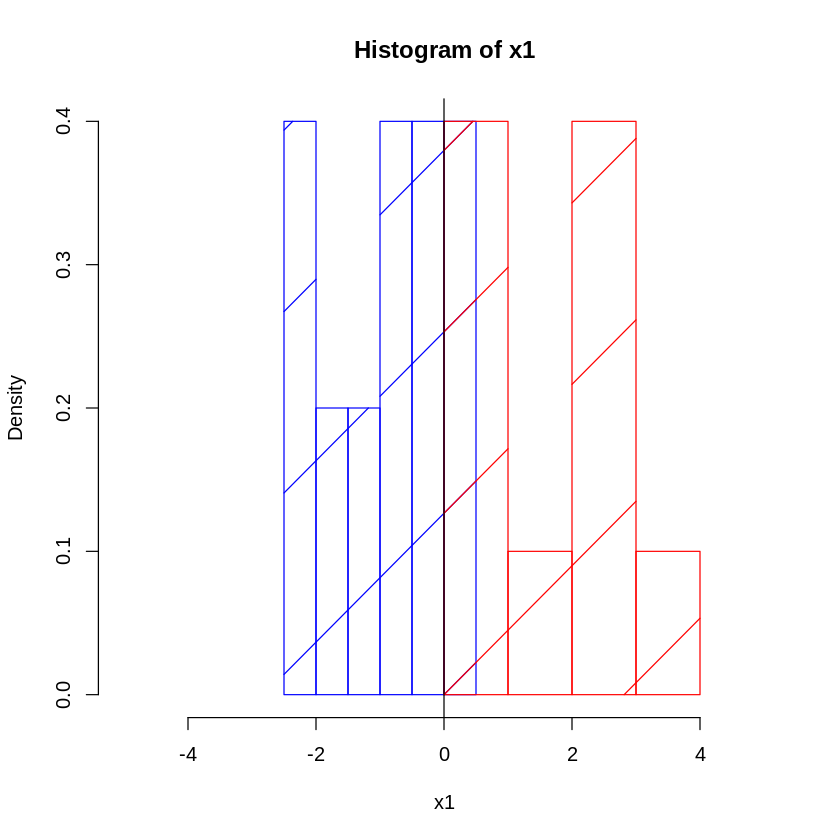

In [ ]:
round(mean(x1),2); round(sd(x1),2)
round(mean(x2),2); round(sd(x2),2)

hist(x1, prob=TRUE, col="blue", xlim=c(-5,5), density=TRUE)
hist(x2, prob=TRUE, col="red", add=TRUE, density=TRUE)
abline(v=0, col="black")

Notice that, although the data is gernerated from distributions with equal variances, the empirical standard deviations differ.

Now let's carve our data into a training set (80%) and a testing set (20%).

In [ ]:
train_portion <- 0.80
train_ind <- 1:round(train_portion*length(x1),0)

x1_train <- x1[train_ind]
x2_train <- x2[train_ind]
x1_test <- x1[-train_ind]
x2_test <- x2[-train_ind]

train_set <- data.frame("class" = rep(c("x1", "x2"), each=length(train_ind)),
                        "value" = c(x1_train, x2_train))

test_set <- data.frame("class" = rep(c("x1", "x2"), each=length(x1) - length(train_ind)),
                       "value" = c(x1_test, x2_test))

In [ ]:
library(MASS)
lda.fit <- lda(class ~ value, data=train_set)
qda.fit <- qda(class ~ value, data=train_set)

In [ ]:
lda.preds <- as.data.frame(round(predict(lda.fit, test_set)$posterior,2))
lda.test_preds <- colnames(lda.preds)[apply(lda.preds, 1, which.max)]
lda.test_actual <- test_set$class
lda.err <- ifelse(test = lda.test_actual=="x1", # Define error as probability of misclassification
                  yes = (1-lda.preds$x1),
                  no = (1-lda.preds$x2))
lda.preds <- cbind(lda.preds, pred = lda.test_preds, actual = lda.test_actual, error=lda.err)
sum(lda.preds$error)

qda.preds <- as.data.frame(round(predict(qda.fit, test_set)$posterior,2))
qda.test_preds <- colnames(qda.preds)[apply(qda.preds, 1, which.max)]
qda.test_actual <- test_set$class
qda.err <- ifelse(test = qda.test_actual=="x1",
                  yes = (1-qda.preds$x1),
                  no = (1-qda.preds$x2))
qda.preds <- cbind(qda.preds, pred = qda.test_preds, actual = qda.test_actual, error=qda.err)
sum(qda.preds$error)

[1] 0.56

[1] 0.59

Thre final output is an estimate of the total error from the `lda.fit` and `qda.fit`.

Let me condense everyting into a single code block so we can repeat the experiment many times quickly.

In [ ]:
n <- 10
x1 <- rnorm(n=n, mean=-1, sd=1)
x2 <- rnorm(n=n, mean=1, sd=1)

############################

train_portion <- 0.80
train_ind <- 1:round(train_portion*length(x1),0)

x1_train <- x1[train_ind]
x2_train <- x2[train_ind]
x1_test <- x1[-train_ind]
x2_test <- x2[-train_ind]

train_set <- data.frame("class" = rep(c("x1", "x2"), each=length(train_ind)),
                        "value" = c(x1_train, x2_train))

test_set <- data.frame("class" = rep(c("x1", "x2"), each=length(x1) - length(train_ind)),
                       "value" = c(x1_test, x2_test))

############################

lda.fit <- lda(class ~ value, data=train_set)
qda.fit <- qda(class ~ value, data=train_set)

##############################

lda.preds <- as.data.frame(round(predict(lda.fit, test_set)$posterior,2))
lda.test_preds <- colnames(lda.preds)[apply(lda.preds, 1, which.max)]
lda.test_actual <- test_set$class
lda.err <- ifelse(test = lda.test_actual=="x1",
                  yes = (1-lda.preds$x1),
                  no = (1-lda.preds$x2))
lda.preds <- cbind(lda.preds, pred = lda.test_preds, actual = lda.test_actual, error=lda.err)


qda.preds <- as.data.frame(round(predict(qda.fit, test_set)$posterior,2))
qda.test_preds <- colnames(qda.preds)[apply(qda.preds, 1, which.max)]
qda.test_actual <- test_set$class
qda.err <- ifelse(test = qda.test_actual=="x1",
                  yes = (1-qda.preds$x1),
                  no = (1-qda.preds$x2))
qda.preds <- cbind(qda.preds, pred = qda.test_preds, actual = qda.test_actual, error=qda.err)

sum(lda.preds$error)
sum(qda.preds$error)

[1] 0.52

[1] 0.51

Run this several times.  In general, LDA should do better than QDA...but not always.  Play with `n`; as `n` increases, the two methods should perform more similarly.  Why?  Because with more data, QDA will get a better estimate of the variances, which means that it will estimate them to be closer to one another with more data.

Okay, one more time.  Let's run this code `m` times in a for loop to test this.

[1] 0.538

[1] 49.96

[1] 50.04

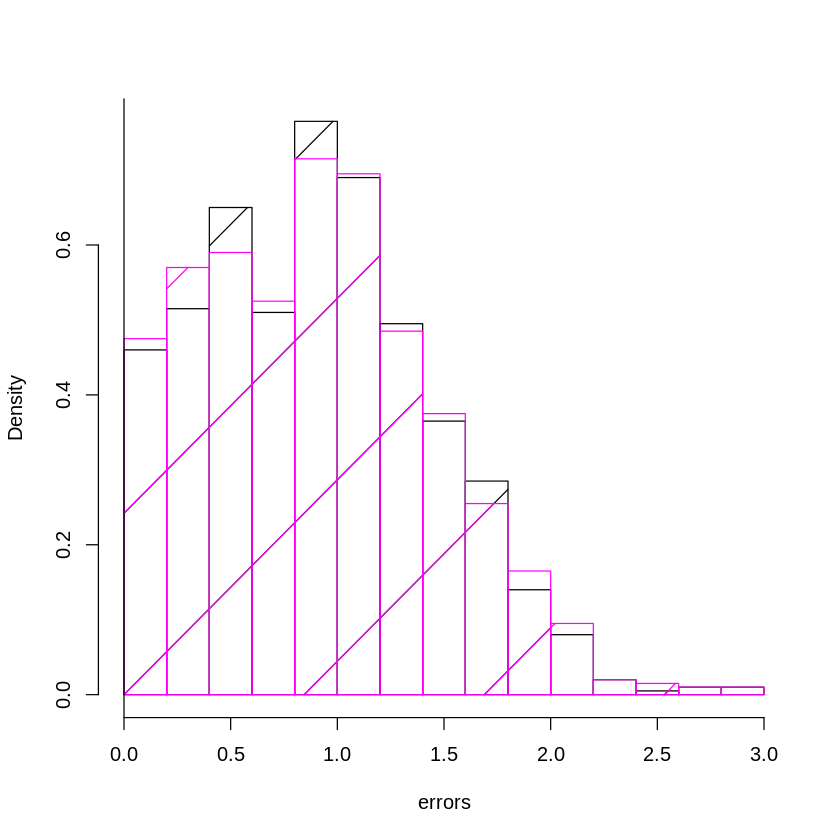

In [ ]:
m <- 1000
n <- 10
lda.errors <- numeric(length=m)
qda.errors <- numeric(length=m)
lda.best <- logical(length=m)

####################################

for(i in 1:m){
  x1 <- rnorm(n=n, mean=-1, sd=1)
  x2 <- rnorm(n=n, mean=1, sd=1)

  ############################

  train_portion <- 0.80
  train_ind <- 1:round(train_portion*length(x1),0)

  x1_train <- x1[train_ind]
  x2_train <- x2[train_ind]
  x1_test <- x1[-train_ind]
  x2_test <- x2[-train_ind]

  train_set <- data.frame("class" = rep(c("x1", "x2"), each=length(train_ind)),
                          "value" = c(x1_train, x2_train))

  test_set <- data.frame("class" = rep(c("x1", "x2"), each=length(x1) - length(train_ind)),
                        "value" = c(x1_test, x2_test))

  ############################

  lda.fit <- lda(class ~ value, data=train_set)
  qda.fit <- qda(class ~ value, data=train_set)

  ##############################

  lda.preds <- as.data.frame(round(predict(lda.fit, test_set)$posterior,2))
  lda.test_preds <- colnames(lda.preds)[apply(lda.preds, 1, which.max)]
  lda.test_actual <- test_set$class
  lda.err <- ifelse(test = lda.test_actual=="x1",
                    yes = (1-lda.preds$x1),
                    no = (1-lda.preds$x2))
  lda.preds <- cbind(lda.preds, pred = lda.test_preds, actual = lda.test_actual, error=lda.err)


  qda.preds <- as.data.frame(round(predict(qda.fit, test_set)$posterior,2))
  qda.test_preds <- colnames(qda.preds)[apply(qda.preds, 1, which.max)]
  qda.test_actual <- test_set$class
  qda.err <- ifelse(test = qda.test_actual=="x1",
                    yes = (1-qda.preds$x1),
                    no = (1-qda.preds$x2))
  qda.preds <- cbind(qda.preds, pred = qda.test_preds, actual = qda.test_actual, error=qda.err)

  ##########################

  lda.errors[i] <- sum(lda.preds$error)
  qda.errors[i] <- sum(qda.preds$error)
  lda.best[i] <- lda.errors[i] <= qda.errors[i]
}

sum(lda.best)/m
round(sum(lda.errors) / sum(lda.errors, qda.errors),4)*100
round(sum(qda.errors) / sum(lda.errors, qda.errors),4)*100
hist(lda.errors, prob=TRUE, col="black", density=TRUE, xlab="errors", main=NULL)
hist(qda.errors, prob=TRUE, col="magenta", add=TRUE, density=TRUE)
abline(v=0, col="black")

According to our simulation, QDA (magenta) is more likely to have more total error than LDA (black); and LDA does as good or better than QDA most of the time.

What happens if the variances differ between the distributions?  We'll see in part b.

#### Answer to b
***If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?***

Now we probably expect QDA to do better on both sets of data.  Why? Because now the decision boundary is nonlinear--i.e., more complex--such that a more flexible approach should do better.

Let's use the previous simulation to test this, now setting the variances to be unequal.

[1] 0.457

[1] 50.63

[1] 49.37

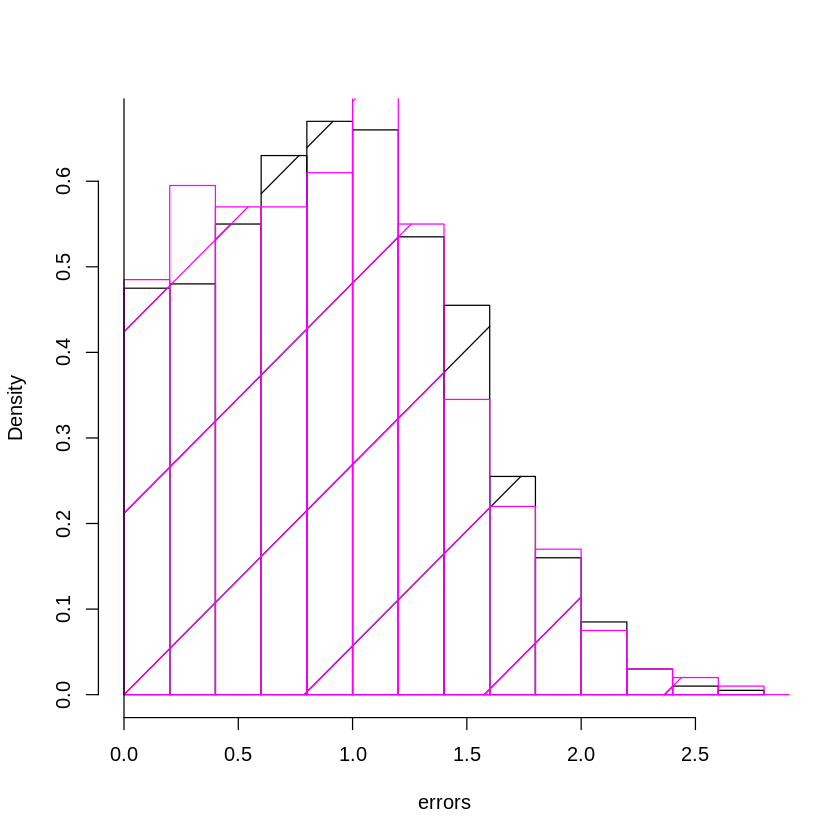

In [ ]:
m <- 1000
n <- 10
lda.errors <- numeric(length=m)
qda.errors <- numeric(length=m)
lda.best <- logical(length=m)

####################################

for(i in 1:m){
  x1 <- rnorm(n=n, mean=-1, sd=0.75)
  x2 <- rnorm(n=n, mean=1, sd=1.25)

  ############################

  train_portion <- 0.80
  train_ind <- 1:round(train_portion*length(x1),0)

  x1_train <- x1[train_ind]
  x2_train <- x2[train_ind]
  x1_test <- x1[-train_ind]
  x2_test <- x2[-train_ind]

  train_set <- data.frame("class" = rep(c("x1", "x2"), each=length(train_ind)),
                          "value" = c(x1_train, x2_train))

  test_set <- data.frame("class" = rep(c("x1", "x2"), each=length(x1) - length(train_ind)),
                        "value" = c(x1_test, x2_test))

  ############################

  lda.fit <- lda(class ~ value, data=train_set)
  qda.fit <- qda(class ~ value, data=train_set)

  ##############################

  lda.preds <- as.data.frame(round(predict(lda.fit, test_set)$posterior,2))
  lda.test_preds <- colnames(lda.preds)[apply(lda.preds, 1, which.max)]
  lda.test_actual <- test_set$class
  lda.err <- ifelse(test = lda.test_actual=="x1",
                    yes = (1-lda.preds$x1),
                    no = (1-lda.preds$x2))
  lda.preds <- cbind(lda.preds, pred = lda.test_preds, actual = lda.test_actual, error=lda.err)


  qda.preds <- as.data.frame(round(predict(qda.fit, test_set)$posterior,2))
  qda.test_preds <- colnames(qda.preds)[apply(qda.preds, 1, which.max)]
  qda.test_actual <- test_set$class
  qda.err <- ifelse(test = qda.test_actual=="x1",
                    yes = (1-qda.preds$x1),
                    no = (1-qda.preds$x2))
  qda.preds <- cbind(qda.preds, pred = qda.test_preds, actual = qda.test_actual, error=qda.err)

  ##########################

  lda.errors[i] <- sum(lda.preds$error)
  qda.errors[i] <- sum(qda.preds$error)
  lda.best[i] <- lda.errors[i] <= qda.errors[i]
}

sum(lda.best)/m
round(sum(lda.errors) / sum(lda.errors, qda.errors),4)*100
round(sum(qda.errors) / sum(lda.errors, qda.errors),4)*100
hist(lda.errors, prob=TRUE, col="black", density=TRUE, xlab="errors", main=NULL)
hist(qda.errors, prob=TRUE, col="magenta", add=TRUE, density=TRUE)
abline(v=0, col="black")

Now QDA is usually doing better, with LDA only doing as well less than half the time.

#### Answer to c
***In general, as the sample size n increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged? Why?***

I assume this is referring to linear decision boundaries, since that's when LDA should perform better than QDA.  We've already answered this in part a.  With larger samples sizes, we get more accurate estimates of variance...which means more likely to notice that the estimates of variance converge.  Hence, we should see QDA and LDA performance converge.

Let's again look at the simulation, now paying attention to the difference in error between LDA and QDA on a linear decision boundary, with a larger sample size `n`.

[1] 0.507

[1] 50.09

[1] 49.91

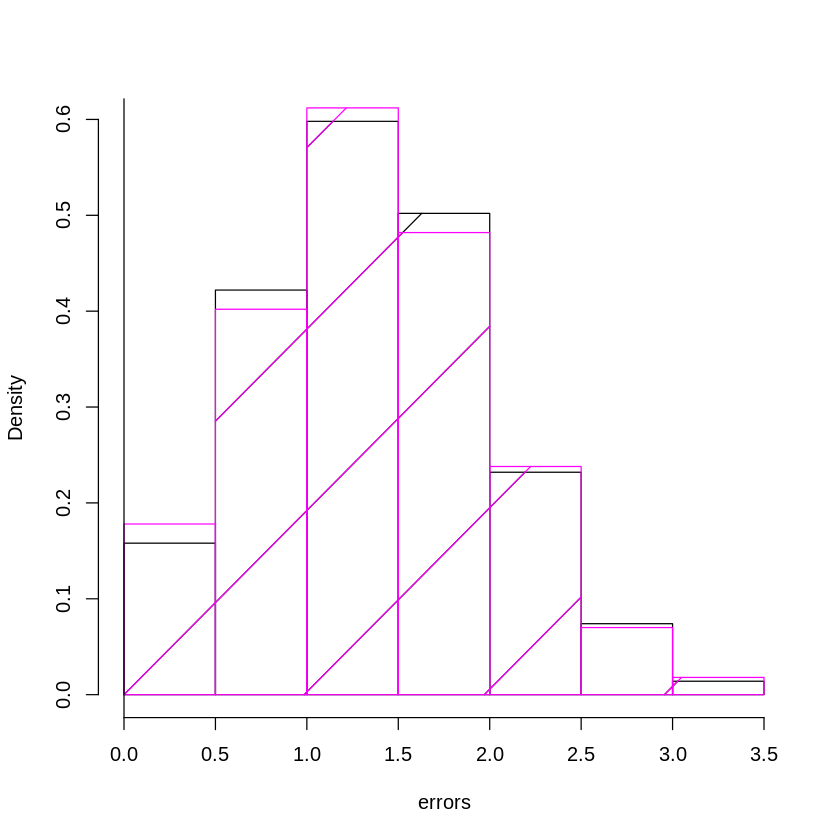

In [ ]:
m <- 1000
n <- 15
lda.errors <- numeric(length=m)
qda.errors <- numeric(length=m)
lda.best <- logical(length=m)

####################################

for(i in 1:m){
  x1 <- rnorm(n=n, mean=-1, sd=1)
  x2 <- rnorm(n=n, mean=1, sd=1)

  ############################

  train_portion <- 0.80
  train_ind <- 1:round(train_portion*length(x1),0)

  x1_train <- x1[train_ind]
  x2_train <- x2[train_ind]
  x1_test <- x1[-train_ind]
  x2_test <- x2[-train_ind]

  train_set <- data.frame("class" = rep(c("x1", "x2"), each=length(train_ind)),
                          "value" = c(x1_train, x2_train))

  test_set <- data.frame("class" = rep(c("x1", "x2"), each=length(x1) - length(train_ind)),
                        "value" = c(x1_test, x2_test))

  ############################

  lda.fit <- lda(class ~ value, data=train_set)
  qda.fit <- qda(class ~ value, data=train_set)

  ##############################

  lda.preds <- as.data.frame(round(predict(lda.fit, test_set)$posterior,2))
  lda.test_preds <- colnames(lda.preds)[apply(lda.preds, 1, which.max)]
  lda.test_actual <- test_set$class
  lda.err <- ifelse(test = lda.test_actual=="x1",
                    yes = (1-lda.preds$x1),
                    no = (1-lda.preds$x2))
  lda.preds <- cbind(lda.preds, pred = lda.test_preds, actual = lda.test_actual, error=lda.err)


  qda.preds <- as.data.frame(round(predict(qda.fit, test_set)$posterior,2))
  qda.test_preds <- colnames(qda.preds)[apply(qda.preds, 1, which.max)]
  qda.test_actual <- test_set$class
  qda.err <- ifelse(test = qda.test_actual=="x1",
                    yes = (1-qda.preds$x1),
                    no = (1-qda.preds$x2))
  qda.preds <- cbind(qda.preds, pred = qda.test_preds, actual = qda.test_actual, error=qda.err)

  ##########################

  lda.errors[i] <- sum(lda.preds$error)
  qda.errors[i] <- sum(qda.preds$error)
  lda.best[i] <- lda.errors[i] <= qda.errors[i]
}

sum(lda.best)/m
round(sum(lda.errors) / sum(lda.errors, qda.errors),4)*100
round(sum(qda.errors) / sum(lda.errors, qda.errors),4)*100
hist(lda.errors, prob=TRUE, col="black", density=TRUE, xlab="errors", main=NULL)
hist(qda.errors, prob=TRUE, col="magenta", add=TRUE, density=TRUE)
abline(v=0, col="black")

#### Answer to d
***True or False: Even if the Bayes decision boundary for a given problem is linear, we will probably achieve a superior test error rate using QDA rather than LDA because QDA is flexible enough to model a linear decision boundary. Justify your answer.***

False, the flexibilty of QDA will tend to cause overfitting when the decision boundary is linear since that excess flexibility will accommodate learning the randomness in the sample and misattributing it to signal.

### Question 6
Suppose we collect data for a group of students in a statistics class with variables $X_1$ = hours studied, $X_2$ = undergrad GPA, and $Y$ = receive an A. We fit a logistic regression and produce estimated coefficient, $\hat{β}_0 = −6$, $\hat{β}_1 = 0.05$, and $\hat{β}_2 = 1$.

> (a) Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class.

> (b) How many hours would the student in part (a) need to study to have a 50% chance of getting an A in the class?

#### Answers
Let's start by remembering what our logistic formula is telling us.  The probabilty of receiving an A, $p(Y)$ is a function of hours studied, $X_1$, and undergrad GPA, $X_2$.  The function is:

$$p(Y) = \frac{exp(\beta_0 + \beta_1 X_1 + \beta_2 X_2)}{1 + exp(\beta_0 + \beta_1 X_1 + \beta_2 X_2)}$$

Importantly, we can write a related expression for the *log odds* of $Y$.

$$ln[\frac{p(Y)}{1-p(Y)}] = \beta_0 + \beta_1 X_1 + \beta_2 X_2$$

##### Answer to a
***Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class.***

To answer this, we simply plug in the given values for $X_1$ and $X_2$.

$$p(Y) = \frac{exp(-6 + 0.05*40 + 1*3.5)}{1 + exp(-6 + 0.05*40 + 1*3.5)} = 37.75\%$$

##### Answer to b
***How many hours would the student in part (a) need to study to have a 50% chance of getting an A in the class?***

Now we're given $p(Y)$ and $X_2$, but need to solve for $X_1$.  We could go the long way here, using algebra to solve for $X_1$ from our expression for $p(Y)$.  But let's use a short cut.

Recall that logistic regression is just a linear model for *log-odds*, where log odds is

$$ln[\frac{p(Y)}{1-p(Y)}] = \beta_0 + \beta_1 X_1 + \beta_2 X_2$$

This expression will be much easier to solve for $X_1$.

$$X_1 = \frac{ln[\frac{p(Y)}{1-p(Y)}] - \beta_0 - \beta_2 X_2}{\beta_1}$$

Now we just plug in the values we're given:

$$X_1 = \frac{ln[\frac{0.50}{0.50}] - -6 - 1(3.5)}{0.05} = \frac{ln[1] + 6 - 3.5}{0
.05} = \frac{0 + 2.5}{0.05} = 50 hours$$

### Question 7
Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on $X$, last year’s percent profit. We examine a large number of companies and discover that the mean value of $X$ for companies that issued a dividend was $\bar{X} = 10$, while the mean for those that didn’t was $\bar{X} = 0$. In addition, the variance of $X$ for these two sets of companies was $\hat{\sigma}^2 = 36$. Finally, 80% of companies issued dividends. Assuming that $X$ follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was $X = 4$ last year.

*Hint: Recall that the density function for a normal random variable is $f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$. You will need to use Bayes’ theorem.*

#### Answer
This is straightforward.  Wee need to apply Bayes' to find the posterior

$$p(Yes | X=4) = p(Yes | X=4, \hat{\mu}=\bar{X}=10, \hat{\sigma}^2=36, p(Yes)=0.80)$$
\
$$= \frac{p(X=4 | Yes) * p(Yes)}{p(X=4)}$$
\
$$= \frac{p(X=4 | Yes) * p(Yes)}{p(X=4 | Yes) * p(Yes) + p(X=4 | No) * p(No)}$$
\
$$= \frac{\frac{1}{\sqrt{72\pi}} e^{-\frac{(4-10)^2}{2*36}} * 0.80}{\frac{1}{\sqrt{72\pi}} e^{-\frac{(4-10)^2}{2*36}} * 0.80 + \frac{1}{\sqrt{72\pi}} e^{-\frac{(4-0)^2}{2*36}} * 0.20}
= \frac{\frac{1}{\sqrt{72\pi}} e^{-\frac{36}{72}} * 0.80}{\frac{1}{\sqrt{72\pi}}(0.80 e^{-\frac{36}{72}} + 0.20 e^{-\frac{16}{72}})}
= \frac{0.80 e^{-\frac{1}{2}}}{0.80 e^{-\frac{1}{2}} + 0.20 e^{-\frac{2}{9}}}
\approx \frac{0.4852}{0.4852 + 0.1601} \approx 75.19%$$

Recall that LDA is the application of this Bayesian classification, assuming that the data is normally distributed and the different classes have the same variance.  So let's test this; LDA should give us the same answer.  I'll start by generating some fake data.

In [ ]:
dividend <- c(rep("Yes", times=80), rep("No", times=20))
Xyes <- rnorm(n=80, mean=10, sd=6)
Xno <- rnorm(n=20, mean=0, sd=6)

d <- data.frame("dividend"=as.factor(dividend),
                "X" = c(Xyes, Xno))

head(d)
tail(d)

,dividend,X
,<fct>,<dbl>
1,Yes,9.7765956
2,Yes,10.1910213
3,Yes,4.3210991
4,Yes,9.2156370
5,Yes,0.4980206
6,Yes,-1.1842020


,dividend,X
,<fct>,<dbl>
95,No,3.9611820
96,No,0.5122605
97,No,3.1473689
98,No,-6.7424005
99,No,5.9126175
100,No,-3.0353120


Now run `lda()`.

Call:
lda(dividend ~ X, data = d)

Prior probabilities of groups:
 No Yes 
0.2 0.8 

Group means:
             X
No  0.07598807
Yes 9.43155027

Coefficients of linear discriminants:
        LD1
X 0.1678828

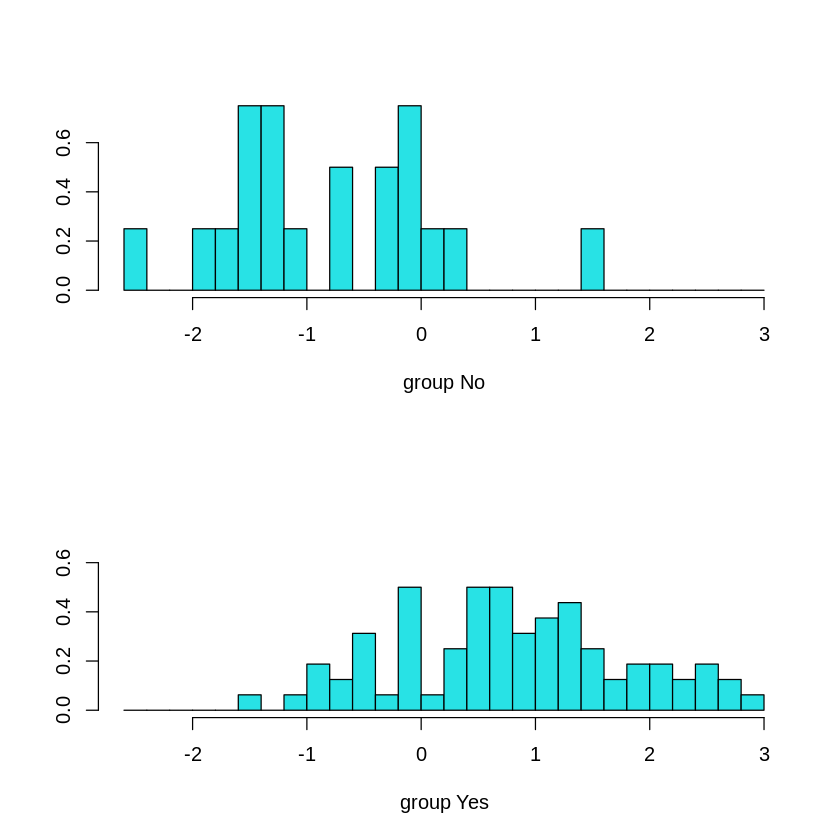

In [ ]:
library(MASS)
div.lda <- lda(dividend ~ X, data=d)

div.lda
plot(div.lda)

We can see the priors are correct (Yes=80%, No=20%) and the means are approximately correct ($\bar{X}_{Yes} \approx 10$, $\bar{X}_{No} \approx 0$).

We can also see the histograms of $Dividend=Yes$ and $Dividend=No$; $X=4$ looks to be safely in the $Yes$ category.

So let's look at how our LDA categorized $X=4$ and it's posterior probability.

In [ ]:
new_obs <- data.frame("X" = 4)
predict(div.lda, new_obs)

$class
[1] Yes
Levels: No Yes

$posterior
         No       Yes
1 0.2336995 0.7663005

$x
         LD1
1 -0.5977362

LDA predicts `$class = "Yes"` with a `$posterior` probability of $\approx 75.19$, which is what we found with Bayes'.  The discrepancy is due to sampling error.

### Question 8
Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e. $K = 1$) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

#### Answer
The question is a bit tricky because there is no training-error rate with K-nearest neighbor; training data is used for training because we already know the correct categories of each data point.  Thus, if we take

$$\bar{\epsilon}_{KNN} = \frac{\epsilon_{train} + \epsilon_{test}}{2}$$

then

$$2\bar{\epsilon}_{KNN} = 0 + \epsilon_{test}$$
$$\rightarrow \epsilon_{test} = 2(0.18) = 0.36$$

which is greater than the 30% error rate from logistic regression.  Hence, we should use logistic regression here.

### Question 9
This problem has to do with odds.

> (a) On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?

> (b) Suppose that an individual has a 16% chance of defaulting on her credit card payment. What are the odds that she will default?

#### Answers
Let's recount what odds are.
$$odds = O = \frac{p}{1-p}$$
where $p$ is the probability of an event.  So "odds" is the ratio of *the probability an event A will occur* over *the probability that A will NOT occur*.

##### Answer to a
***On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?***

If the *Event* is defaulting, then we need to solve $O(default) = 0.37 = \frac{p}{1-p}$ for $p$.

Generally, we can solve for $p$ like

$$O=\frac{p}{1-p}$$
$$\rightarrow O(1-p) = O-Op = p$$
$$\rightarrow O=p + Op= p(1+O)$$
$$\rightarrow p = \frac{O}{1+O}$$

So plugging in $O=0.37$, we get

$$p = \frac{0.37}{1 + 0.37} \approx 0.27$$

##### Answer to b
***Suppose that an individual has a 16% chance of defaulting on her credit card payment. What are the odds that she will default?***

Just using our definition of odds and plugging in $p=0.16$, we get

$$O(default|p=0.16) = \frac{0.16}{1-0.16} \approx 0.19$$

### Question 10❗
Equation 4.32 (p. 168) derived an expression for $log\left(\frac{Pr(Y =k|X=x)}{Pr(Y =K|X=x)}\right)$(See NOTE below) in the setting where $p > 1$, so that the mean for the $k^{th}$ class, $µ_k$, is a $p$-dimensional vector, and the shared covariance $Σ$ is a $p × p$ matrix. However, in the setting with $p = 1$, (4.32) takes a simpler form, since the means $µ_1,...,µ_K$ and the variance $σ^2$ are scalars. In this simpler setting, repeat the calculation in (4.32), and provide expressions for $a_k$ and $b_{kj}$ in terms of $π_k$, $π_K$, $µ_k$, $µ_K$, and $σ^2$.

> NOTE: The derived expression is
> $$log\left(\frac{Pr(Y =k|X=x)}{Pr(Y =K|X=x)}\right) = a_k + \sum_{j=1}^P b_{kj}x_j$$
> where
> $$a_k = log(\frac{\pi_k}{\pi_K})-\frac{1}{2}(\mu_k + \mu_K)^T \Sigma^{-1}(\mu_k - \mu_K)$$
and
$$b_{kj} = \Sigma_j^{-1}(\mu_k - \mu_K)$$

#### Answer
For context, (4.32) is set in section 4.5.1, where the authors are comparing LDA, QDA, naive Bayes, and logistic regression--where we are trying to categorize observations among $K$ classes.  With each method, we are trying to assign each observation to the class $k$ for which $p(Y=k|X=x)$ is greatest.   Doing this is equivalent to assigning each observation to the class $k$ for which $log(\frac{Pr(Y =k|X=x)}{Pr(Y =K|X=x)})$ is greatest.

You can follow along with the steps provided for (4.32).  


\begin{align*}
\log\left(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)}\right)
 & = \log\left(\frac{\pi_k f_k(x)}{\pi_K f_K(x)}\right) \\
 & = \log\left(\frac{\pi_k \exp(-\frac{1}{2}((x-\mu_k)/\sigma)^2)}{\pi_K \exp(-\frac{1}{2}((x-\mu_K)/\sigma)^2)}\right) \\
 & = \log\left(\frac{\pi_k}{\pi_K}\right) - \frac{1}{2} \left(\frac{x-\mu_k}{\sigma}\right)^2 + \frac{1}{2} \left(\frac{x-\mu_K}{\sigma}\right)^2 \\
 & = \log\left(\frac{\pi_k}{\pi_K}\right) - \frac{1}{2\sigma^2} (x-\mu_k)^2 + \frac{1}{2\sigma^2} (x-\mu_K)^2 \\
 & = \log\left(\frac{\pi_k}{\pi_K}\right) - \frac{1}{2\sigma^2} \left((x-\mu_k)^2 - (x-\mu_K)^2\right) \\
 & = \log\left(\frac{\pi_k}{\pi_K}\right) - \frac{1}{2\sigma^2} \left(x^2-2x\mu_k+\mu_k^2 - x^2 + 2x\mu_K - \mu_K^2\right) \\
 & = \log\left(\frac{\pi_k}{\pi_K}\right) - \frac{1}{2\sigma^2} \left(2x(\mu_K - \mu_k) + \mu_k^2 -\mu_K^2\right) \\
 & = \log\left(\frac{\pi_k}{\pi_K}\right) - \frac{\mu_k^2 -\mu_K^2}{2\sigma^2} + x \frac{\mu_k - \mu_K}{\sigma^2} \\
 & = a_k + \sum_{j=1}^p b_{kj} x_j
\end{align*}

where

$$a_k = \log\left(\frac{\pi_k}{\pi_K}\right) - \frac{\mu_k^2 -\mu_K^2}{2\sigma^2}$$

and

$$b_k = \frac{(\mu_k - \mu_K)}{\sigma^2}$$

Notice the similarity of the expression we derived here:

$$d_k(x) = \log\left(\frac{\pi_k}{\pi_K}\right) - \frac{\mu_k^2 -\mu_K^2}{2\sigma^2} + x \frac{\mu_k - \mu_K}{\sigma^2}$$

to the expression (here, slightly rearranged) we derived for $\delta_k^{LDA}(x)$ in Question 2:

$$\delta_k^{LDA}(x) = log(\pi_k) - \frac{\mu_k^2}{2 \sigma^2} + x \frac{\mu_k}{\sigma^2}$$

It should make since that, since each class $k$ is being compared against the same reference $K$, the class with the greatest $d_k(x)$ will also have the greatest $\delta_k^{LDA}(x)$.  In effect, we can *drop* all $K$-references from $d_k(x)$ to get $\delta_k^{LDA}(x)$.

### Question 11❗
Work out the detailed forms of $a_k$, $c_{kj}$ , and $b_{kjl}$ in (4.33).

$$\log\left(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)}\right)
= a_k + \sum_{j=1}^p b_{kj}x_j + \sum_{j=1}^p \sum_{l=1}^p c_{kjl} x_j x_l$$

Your answer should involve $π_k$, $π_K$, $µ_k$, $µ_K$, $Σ_k$, and $Σ_K$.

#### Answer
Here, we'll retrace the steps taken in (4.32), but now assuming different covariance matrixes $\Sigma_k$ among the classes $k$.

\begin{align*}
\log\left(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)}\right)
 & = \log\left(\frac{\pi_k f_k(x)}{\pi_K f_K(x)}\right) \\
 & = \log\left(\frac{\pi_k \exp(-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)}{\pi_K \exp(-\frac{1}{2}(x-\mu_K)^T\Sigma_K^{-1}(x-\mu_K)}\right) \\
 & = \log\left(\frac{\pi_k}{\pi_K} \right) +
 (- \frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k) -
 (- \frac{1}{2}(x-\mu_K)^T\Sigma_K^{-1}(x-\mu_K)))\\
 & = \log\left(\frac{\pi_k}{\pi_K} \right)
 - \frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)
 + \frac{1}{2}(x-\mu_K)^T\Sigma_K^{-1}(x-\mu_K)\\
 & = \log\left(\frac{\pi_k}{\pi_K} \right)
 - \frac{1}{2}((x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)
 - (x-\mu_K)^T\Sigma_K^{-1}(x-\mu_K))\\
 & = \log\left(\frac{\pi_k}{\pi_K} \right)
 + \frac{1}{2}((x-\mu_K)^T\Sigma_K^{-1}(x-\mu_K)
 - (x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k))\\
 & = \log\left(\frac{\pi_k}{\pi_K} \right) + \frac{1}{2}
 ((x^T \Sigma_K^{-1} x
 - x^T \Sigma_K^{-1} \mu_K
 - \mu_K^T \Sigma_K^{-1} x
 + \mu_K^T \Sigma_K^{-1} \mu_K)
 - (x^T \Sigma_k^{-1} x
 - x^T \Sigma_k^{-1} \mu_k
 - \mu_k^T \Sigma_k^{-1} x
 + \mu_k^T \Sigma_k^{-1} \mu_k))\\
 & = \log\left(\frac{\pi_k}{\pi_K} \right) + \frac{1}{2}
 (x^T \Sigma_K^{-1} x
 - x^T \Sigma_K^{-1} \mu_K
 - \mu_K^T \Sigma_K^{-1} x
 + \mu_K^T \Sigma_K^{-1} \mu_K
 -x^T \Sigma_k^{-1} x
 + x^T \Sigma_k^{-1} \mu_k
 + \mu_k^T \Sigma_k^{-1} x
 - \mu_k^T \Sigma_k^{-1} \mu_k)\\
 & = \log\left(\frac{\pi_k}{\pi_K} \right) +
 \frac{1}{2}(\mu_K^T \Sigma_K^{-1} \mu_K - \mu_k^T \Sigma_k^{-1} \mu_k)
 + \frac{1}{2}(x^T \Sigma_k^{-1} \mu_k + \mu_k^T \Sigma_k^{-1} x - x^T \Sigma_K^{-1} \mu_K - \mu_K^T \Sigma_K^{-1} x)
 + \frac{1}{2}(x^T \Sigma_K^{-1} x - x^T \Sigma_k^{-1} x)\\
 & = \log\left(\frac{\pi_k}{\pi_K} \right) +
 \frac{1}{2}(\mu_K^T \Sigma_K^{-1} \mu_K - \mu_k^T \Sigma_k^{-1} \mu_k)
 + \frac{1}{2}(x^T (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K) + (\mu_k^T \Sigma_k^{-1} - \mu_K^T \Sigma_K^{-1})x)
+ \frac{1}{2}(x^T (\Sigma_K^{-1} - \Sigma_k^{-1}) x)\\
 & = a_k + \sum_{j=1}^p b_{kj}x_j + \sum_{j=1}^p \sum_{l=1}^p c_{kjl} x_j x_l
\end{align*}

where

>$a_k = \log\left(\frac{\pi_k}{\pi_K} \right) +
 \frac{1}{2}(\mu_K^T \Sigma_K^{-1} \mu_K - \mu_k^T \Sigma_k^{-1} \mu_k)$,

> $\sum_{j=1}^p b_{kj}x_j = \frac{1}{2}(x^T (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K) + (\mu_k^T \Sigma_k^{-1} - \mu_K^T \Sigma_K^{-1})x)$,

> and

> $\sum_{l=1}^p c_{kjl} x_j x_l = \frac{1}{2}(x^T (\Sigma_K^{-1} - \Sigma_k^{-1}) x)$ such that $c_{kjl} = \frac{1}{2}(\Sigma_K^{-1} - \Sigma_k^{-1})_{jl}$.

\

To get $\sum_{j=1}^p b_{kj}x_j$ into its final form, realize that both $x^T (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K)$ and $(\mu_k^T \Sigma_k^{-1} - \mu_K^T \Sigma_K^{-1})x$ are scalars of equal value.  Taking the transpose of a scalar returns the same value so that
$x^T (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K) =
(x^T (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K))^T =
(\mu_k^T \Sigma_k^{-1} - \mu_K^T \Sigma_K^{-1})x =
((\mu_k^T \Sigma_k^{-1} - \mu_K^T \Sigma_K^{-1})x)^T$.  We need to add two terms; since each term is equal, let's pick two convenient ones: I'll choose the first and the last which, after applying the $T$ranspose to the last and then extracting the $x^T$ in common, simplifies to $x^T((\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K) + (\mu_k^T \Sigma_k^{-1} - \mu_K^T \Sigma_K^{-1})^T) = x^T((\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K) + (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K)) = x^T(2 (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K))$.

So altogether, we now have $\sum_{j=1}^p b_{kj}x_j = \frac{1}{2} x^T(2 (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K)) = x^T (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K)$.

Hence, $b_{kj} = (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K)_j$

### Question 12
Suppose that you wish to classify an observation $X ∈ R$ into `apples` and `oranges`. You fit a logistic regression model and find that

$$\hat{Pr}(Y = orange|X = x) = \frac{\exp(\hat{β}_0 + \hat{β}_1x)}{1 + \exp(\hat{β}_0 + \hat{β}_1x)}$$.

Your friend fits a logistic regression model to the same data using the *softmax* formulation in (4.13),

and finds that

$$\hat{Pr}(Y = orange|X = x) = \frac{\exp(\hat{α}_{orange0} + \hat{α}_{orange1}x)}{\exp(\hat{α}_{orange0} + \hat{α}_{orange1}x) + \exp(\hat{α}_{apple0} + \hat{α}_{apple1}x)}$$.

> (a) What is the log odds of `orange` versus `apple` in your model?

> (b) What is the log odds of `orange` versus `apple` in your friend’s model?

> (c) Suppose that in your model, $\hat{β}_0 = 2$ and $\hat{β}_1 = −1$. What are the coefficient estimates in your friend’s model? Be as specific as possible.

> (d) Now suppose that you and your friend fit the same two models on a different data set. This time, your friend gets the coefficient estimates $\hat{α}_{orange0} = 1.2$, $\hat{α}_{orange1} = −2$, $\hat{α}_{apple0} = 3$, $\hat{α}_{apple1} = 0.6$. What are the coefficient estimates in your model?

> (e) Finally, suppose you apply both models from (d) to a data set with 2,000 test observations. What fraction of the time do you expect the predicted class labels from your model to agree with those from your friend’s model? Explain your answer.

#### Answer to a
***What is the log odds of orange versus apple in your model?***

Recall that the *log odds* is just $\ln(\frac{p}{1-p})$.  The expression we're given is for $p$, $p = \frac{\exp({X\beta})}{1 + exp(X\beta)}$.  So

$$\ln\left(\frac{p}{1-p}\right)
= \ln\left(\frac{\frac{\exp({X\beta})}{1 + \exp(X\beta)}}{1 - \frac{\exp({X\beta})}{1 + exp(X\beta)}}\right)
= \ln\left(\frac{\frac{\exp({X\beta})}{1 + \exp(X\beta)}}{\frac{1 + \exp(X\beta)}{1 + \exp(X\beta)} - \frac{\exp({X\beta})}{1 + \exp(X\beta)}}\right)
= \ln\left(\frac{\frac{\exp({X\beta})}{1 + \exp(X\beta)}}{\frac{1 + \exp(X\beta)-\exp(X\beta)}{1 + \exp(X\beta)}}\right)
=\ln\left(\frac{\frac{\exp({X\beta})}{1 + \exp(X\beta)}}{\frac{1}{1 + \exp(X\beta)}}\right)
= \ln\left(\frac{\exp(X\beta}{1 + \exp(X\beta)} \frac{1 + \exp(X\beta)}{1}\right) = \ln(\exp(X\beta)) = X\beta$$

So the log odds here are

$$logodds = \frac{\hat{Pr}(Y = orange|X = x)}{1 - \hat{Pr}(Y = orange|X = x)} = \hat{\beta}_0 + \hat{\beta}_1x$$

#### Answer to b
***What is the log odds of orange versus apple in your friend’s model?***

Let's go through the same exercise as part a, but with our friends softmax expression.  I'll use $\gamma$ to represent the otherwise-$\beta$ coefficeints for all but the class being evaluated in the numerator.

$$ln\left(\frac{p}{1-p}\right)
= ln\left(\frac{\frac{\exp(X\beta)}{\exp(X\beta) + \sum{\exp(X\gamma)}}}{1 - \frac{\exp(X\beta)}{\exp(X\beta) + \sum{\exp(X\gamma)}}}\right)
= ln\left(\frac{\frac{\exp(X\beta)}{\exp(X\beta) + \sum{\exp(X\gamma)}}}{\frac{\exp(X\beta) + \sum{\exp(X\gamma)}}{\exp(X\beta) + \sum{\exp(X\gamma)}} - \frac{\exp(X\beta)}{\exp(X\beta) + \sum{\exp(X\gamma)}}}\right)
= ln\left(\frac{\frac{\exp(X\beta)}{\exp(X\beta) + \sum{\exp(X\gamma)}}}{\frac{\exp(X\gamma)}{\exp(X\beta) + \sum{\exp(X\gamma)}}}\right)
= \ln\left(\frac{\exp(X\beta)}{\exp(X\beta) + \sum{\exp(X\gamma)}}\frac{\exp(X\beta) + \sum{\exp(X\gamma)}}{\sum{\exp(X\gamma)}}\right)
= \ln\left(\frac{\exp(X\beta)}{\sum\exp(X\gamma)}\right)
= \ln(\exp(X\beta)) - \ln\left(\sum\exp(X\gamma)\right) = X\beta - \ln(\sum\exp X\gamma)$$

In our problem, $\gamma$ is only assigned to one class, so this simplifies to $X\beta - X\gamma = X(\beta - \gamma)$

So thre log oods here are

$$logodds = \frac{\hat{Pr}(Y = orange|X = x)}{1 - \hat{Pr}(Y = orange|X = x)}
= (\hat{\alpha}_{orange0} - \hat{\alpha}_{apple0}) + x(\hat{\alpha}_{orange1} - \hat{\alpha}_{apple1})$$

#### Answer to c
***Suppose that in your model,  $\hat{β}_0 = 2$  and  $\hat{β}_1 = −1$ . What are the coefficient estimates in your friend’s model? Be as specific as possible.***

This just comes down to setting the two expressions for log odds equal to one another, enter the coefficient estimates from *our* expression, and solve for those of our friends.

$$our \ logodds = \hat{\beta}_0 + \hat{\beta}_1x = 2 - x$$

which implies

$$(\hat{\alpha}_{orange0} - \hat{\alpha}_{apple0}) = \hat{\beta}_0 = 2$$
$$(\hat{\alpha}_{orange1} - \hat{\alpha}_{apple1}) = \hat{\beta}_1 = -1$$

#### Answer to d
***Now suppose that you and your friend fit the same two models on a different data set. This time, your friend gets the coefficient estimates $\hat{α}_{orange0} = 1.2$, $\hat{α}_{orange1} = −2$, $\hat{α}_{apple0} = 3$, $\hat{α}_{apple1} = 0.6$. What are the coefficient estimates in your model?***

Just reversing what we did aboveL

$$friend's \ logodds = (1.2 - 3) + x(-2 - 0.6) = -1.8 - 1.4x$$

which implies

$$\hat{\beta}_0 = -1.8$$
$$\hat{\beta}_1 = -1.4$$
$$Our \ logodds = -1.8 -1.4x$$


#### Answer to e
***Finally, suppose you apply both models from (d) to a data set with 2,000 test observations. What fraction of the time do you expect the predicted class labels from your model to agree with those from your friend’s model? Explain your answer.***

Always; these are both valid and equivalent expressions of the log odds.  The coefficients will be estimated to fit the same value, $\hat{Pr}(Y = orange|X = x)$.

## Applied

### Question 13
This question should be answered using the `Weekly` data set, which is part of the `ISLR2` package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

> (a) Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?

> (b) Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

> (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

> (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with `Lag2` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

> (e) Repeat (d) using LDA.

> (f) Repeat (d) using QDA.

> (g) Repeat (d) using KNN with $K = 1$.

> (h) Repeat (d) using naive Bayes.

> (i) Which of these methods appears to provide the best results on this data?

> (j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for $K$ in the KNN classifier.

#### Answers
First, let's load the package and data

In [ ]:
install.packages("ISLR2")
library(ISLR2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
d <- Weekly # renaming data.frame() in order to reduce typing

##### Answer to a
***Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?***

Let's get a look at the data.

In [ ]:
head(d)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
6,1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


I want to know what these variables represent, so let's call the help file.

In [ ]:
?Weekly

We can get a crude summary of each variable with the `summary()` function, as well as a rough idea of their relationships with the `pairs()` function.

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”


Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume     Today 
 6.033182  2.357013  2.357254  2.360502  2.360279  2.361285  1.686636  2.356927 
Direction 
       NA

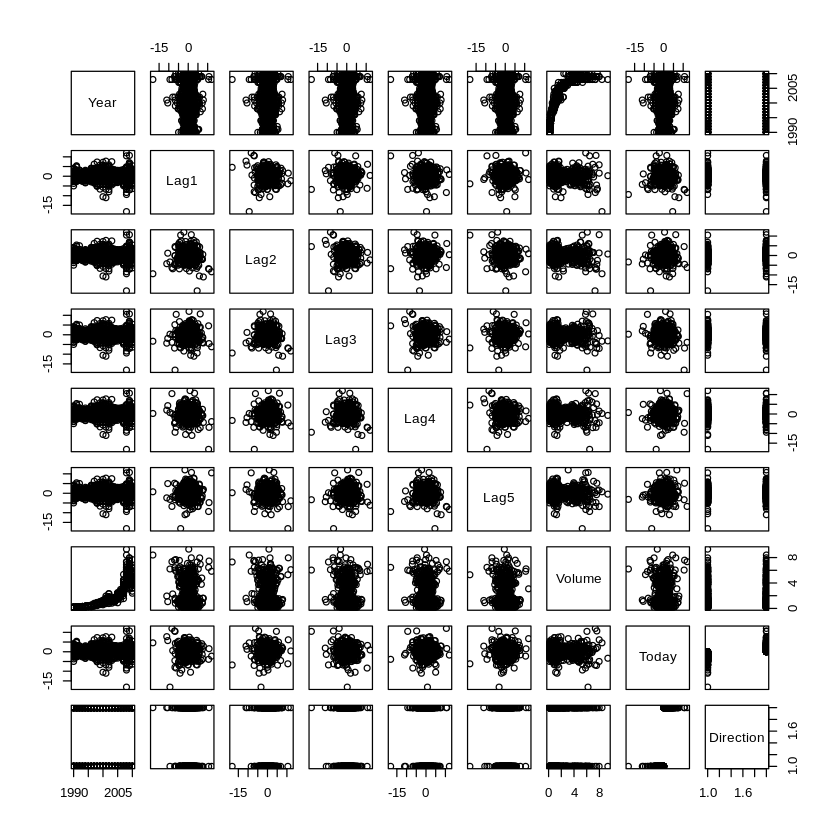

In [ ]:
summary(d)
apply(d, 2, sd)
pairs(d)

I want to get a better look at the relations between each `Lag`, as well as `Volume`, with `Today`.  I'm going to do this as a heatmap.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



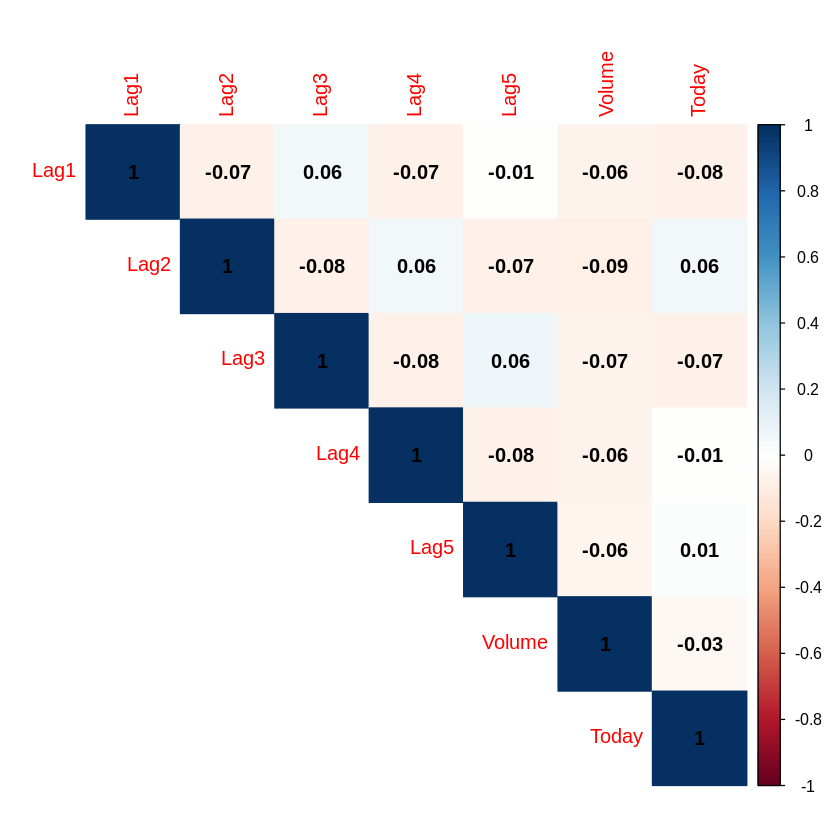

In [ ]:
install.packages("corrplot")
library(corrplot)
corrplot(cor(d[,2:8]), method = "color", type = "upper", addCoef.col = "black")

It's hard to say that there are any strong patterns.  For at least a few weeks, and excluding `Volume`, the correlations with `Lags` seem to oscillate...which could be interesting.

##### Answer to b
***Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?***

In [ ]:
logit_reg <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume,
               family = binomial(link = "logit"),
               data = d)

Firstly, we want to check to see how the outcome `Direction` is being encoded.  It would be natural to think `Direction == "Up"` would correspond to greater log-odds, but we need to make sure that this is how R is thinking about it.

R tends to use the first `level` in a factor variable (e.g., `Direction`) as the reference value--setting it to `0`.  Further, levels are generally assigned alphabetically; since `Down` comes before `Up`, our assumption should be correct.  We can check with the `contrasts()` function.

In [ ]:
contrasts(d$Direction)

,Up
Down,0
Up,1


Great, our model is encoding `Down` as 0 and `Up` as 1.  This means greater log-odds should be interpretted as greater probability of `Up`.

Now let's look at the output.

In [ ]:
summary(logit_reg)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial(link = "logit"), data = d)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Besides the `(Intercept)`, which suggests a significant propensity for increases, the model also predicts a significantly positive relation between `Lag2` and `Direction`; when `Lag2` is higher, there is a greater chance that `Direction` will be `Up`.

How much greater?  Well, the coefficient `Estimate` for `Lag1` represents the change to the log-odds.  Taking the exponential of the log-odds will yield the odds.

In [ ]:
(Lag2_d.odds <- exp(coef(log_reg)[3]))

Lag2 
1.060183

So our odds of `Up` increases by 6% for a 1-unit increase in `Lag2`, holding all other variables constant.  Note that a 2-unit increase in `Lag2` would correspond to odds $1.06^2 = 1.12$, which means a 12% increase.

##### Answer to c
***Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.***

In [ ]:
Direction_probs <- predict(log_reg, type="response")
Direction_predictions <- ifelse(test = Direction_probs >= 0.5,
                                yes = "Up",
                                no = "Down")

table("Predictions"=Direction_predictions, "Acutal"=d$Direction)

           Acutal
Predictions Down  Up
       Down   54  48
       Up    430 557

In the data, we had 484 cases of `Down` (sum left column of final `table`) and 605 cases of `Up` (sum right column of final `table`).  Our logisitc regression under-assigns 102 cases as `Down` (sum top row of final `table`) and over-assigns 987 cases as `Up` (sum bottom row of final `table`).

Overall, we model is `(54 + 557) / (54 + 48 + 430 + 557) = 56.1%` accurate.

When the data is `Down`, our model captures this `54 / (54 + 430) = 11.2%`.  When the data is `Up`, our model capture this `557 / (557 + 48) = 92.1%`.  Hence, it is missing `100 - 11.2 = 88.8%` of actual `Down`s but only `100 - 92.1 = 7.9%` of `Up`s.

Our model is making "false-`Down`" predictions for `48 / (48 + 54) = 47.0%` of its `Down` predictions, and "false-`Up`" predictions for `430 / (430 + 557) = 43.6%` of its `Up` predictions.  Hence, only `100 - 47.0 = 53.0%` of its `Down` predictions are correct while only `100 - 43.6 = 56.4%` of its `Up` predictions are correct.

##### Answer to d
***Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).***

First, we need to set up the *training data*.

In [ ]:
train_ind <- d$Year <= 2008
d_train <- d[train_ind,]
d_test <- d[!train_ind,]

Now let's regress `Direction ~ Lag2` using only data in `d_train`.

In [ ]:
logit_reg.train <- glm(Direction ~ Lag2,
                     family = binomial(link = "logit"),
                     data = d_train)

summary(logit_reg.train)


Call:
glm(formula = Direction ~ Lag2, family = binomial(link = "logit"), 
    data = d_train)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


The result for `Lag2` is similar to before.

Now let's compute the confusion matrix.  Careful, we'll use the predictions for the data in `d_test`, using the model we trained on `d_train`.

In [ ]:
Direction_probs2 <- predict.glm(logit_reg.train, newdata = d_test, type="response")
Direction_predictions2 <- ifelse(test = Direction_probs2 >= 0.5,
                                      yes = "Up",
                                      no = "Down")

(logit.confuse <- table("Predictions"=Direction_predictions2, "Actual"=d_test$Direction))

           Actual
Predictions Down Up
       Down    9  5
       Up     34 56

Let's compare to the predictions on the training data.

| Metric          | Performance on Training Data | Performance on Testing Data |
|-----------------|------------------------------|-----------------------------|
|Overall True     |$611/1089=56.1\%$             |$67/104=64.4\%$              |
|True when Down   |$54/484=11.2\%$               |$9/43=20.1\%$                |
|True when Up     |$557/605=91.1\%$              |$56/61=91.2\%$               |

##### Answer to e
***Repeat (d) using LDA.***

We've already paritioned our data into *training* and *test* sets.  So we can just jump into running the LDA on the training data.

In [ ]:
library(MASS)

lda.fit <- lda(Direction ~ Lag2, data=d_train)
lda.probs <- predict(lda.fit, newdata=d_test, type="response")
lda.predict <- ifelse(test = lda.probs[["posterior"]][,2] >= 0.5,
                      yes="Up",
                      no="Down")
(lda.confuse <- table("Prediction"=lda.predict, "Actual"=d_test$Direction))


Attaching package: ‘MASS’


The following object is masked from ‘package:ISLR2’:

    Boston




          Actual
Prediction Down Up
      Down    9  5
      Up     34 56

##### Answer to f
***Repeat (d) using QDA.***

In [ ]:
library(MASS)

qda.fit <- qda(Direction ~ Lag2, data=d_train)
qda.probs <- predict(qda.fit, newdata=d_test, type="response")
qda.predict <- ifelse(test = qda.probs[["posterior"]][,2] >= 0.5,
                      yes="Up",
                      no="Down")
(qda.confuse <- table("Prediction"=qda.predict, "Actual"=d_test$Direction))

          Actual
Prediction Down Up
        Up   43 61

Apparently, the posterior for each `newdata` is above 50% for `Up`.  We should verify this.

In [ ]:
qda.probs[["posterior"]]

,Down,Up
986,0.4784630,0.5215370
987,0.2693952,0.7306048
988,0.4735416,0.5264584
989,0.4729118,0.5270882
990,0.4802735,0.5197265
991,0.4709913,0.5290087
992,0.3285302,0.6714698
993,0.4700366,0.5299634
994,0.4374287,0.5625713
995,0.4727086,0.5272914


##### Answer to g
***Repeat (d) using KNN with $K=1$.***

In [ ]:
library(class)

knn.predict <- knn(as.matrix(d_train$Lag2), as.matrix(d_test$Lag2), d_train$Direction, k=1)
(knn.confuse <- table("Prediction"=knn.predict, "Actual"=d_test$Direction))

          Actual
Prediction Down Up
      Down   21 30
      Up     22 31

##### Answer to h
***Repeat (d) using naive Bayes***.

In [ ]:
#install.packages("e1071")
library(e1071)

nb.fit <- naiveBayes(Direction ~ Lag2, data=d_train)

nb.predict <- predict(nb.fit, newdata=d_test, type="class")
(nb.confuse <- table("Prediction"=nb.predict, "Acutal"=d_test$Direction))

          Acutal
Prediction Down Up
      Down    0  0
      Up     43 61

##### Answer to i
***Which of these methods appears to provide the best results on this data?***

I think the answer to this is predicated on the what we value.  For example, we may stand to gain more if we are correct in predicting that the market will go Up versus correctly predicting that the market will go Down.  In this case, we will prefer the method that makes the most true-Up predictions.  Here, that would mean we prefer either the QDA or naive Bayes (which correctly predict Up on the test data all 61 times).

Conversely, we may stand to lose more when we incorrectly predict Up (the market actually goes Down) compared to when we incorrectly predict Down (the market actually goes Up).  In this case, we prefer the method that makes the fewest false-Up predictions.  Here, that would mean we prefer KNN (which incorrectly predict Up 22 times).

There's probably times that we only care about gains or only care about losses.  For instance, we might only care about gains if losses are capped but gains are virtually limitless.  Conversely, we might only care about losses if gains are capped but losses can ruin us.  At other times, we will be concerned with both gains and losses.  Let's say (in a simplified example) that all correct predictions gain us \$2 while all incorrect predictions lose us \$1 dollar.  Then we are looking to maximize true-positives and true negatives.  We can see which method does the best by applying this formula to each confusion matrix.

In [ ]:
2*sum(diag(logit.confuse)) - (sum(logit.confuse) - sum(diag(logit.confuse)))
2*sum(diag(lda.confuse)) - (sum(lda.confuse) - sum(diag(lda.confuse)))
2*sum(diag(qda.confuse)) - (sum(qda.confuse) - sum(diag(qda.confuse)))
2*sum(diag(knn.confuse)) - (sum(knn.confuse) - sum(diag(knn.confuse)))
2*sum(diag(nb.confuse)) - (sum(nb.confuse) - sum(diag(nb.confuse)))

[1] 91

[1] 91

[1] 25

[1] 52

[1] 79

So in this context, the logistic regression and LDA do best.

We could continue making more-complicated gain-loss criteria and estimating the expected value from using each method.  For example, if true-Down predictions gain us \$5, true-Up predictions gain us \$1, and all false-Down predictions lose us \$2 and all false-Up predictions lose us \$1.

In [ ]:
5*logit.confuse[1,1] + 1*logit.confuse[2,2] - 2*logit.confuse[1,2] - 1*logit.confuse[2,1]
5*lda.confuse[1,1] + 1*lda.confuse[2,2] - 2*lda.confuse[1,2] - 1*lda.confuse[2,1]
1*qda.confuse[1,2] - 1*qda.confuse[1,1]
5*knn.confuse[1,1] + 1*knn.confuse[2,2] - 2*knn.confuse[1,2] - 1*knn.confuse[2,1]
5*nb.confuse[1,1] + 1*nb.confuse[2,2] - 2*nb.confuse[1,2] - 1*nb.confuse[2,1]

[1] 57

[1] 57

[1] 18

[1] 54

[1] 18

##### Answer to j
***Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for $K$ in the KNN classifier.***

I think I'll leave this to the reader.

### Question 14
In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

> (a) Create a binary variable, `mpg01`, that contains a `1` if `mpg` contains a value above its median, and a `0` if `mpg` contains a value below its median. You can compute the median using the `median()` function. Note you may find it helpful to use the `data.frame()` function to create a single data set containing both `mpg01` and the other `Auto` variables.

> (b) Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

> (c) Split the data into a training set and a test set.

> (d) Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

> (e) Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

> (f) Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

> (g) Perform naive Bayes on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

> (h) Perform KNN on the training data, with several values of $K$, in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? Which value of $K$ seems to perform the best on this data set?

#### Answers
Let's load the packagae and data.

In [ ]:
install.packages("ISLR2")
library(ISLR2)

d <- Auto

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
str(d)

'data.frame':	392 obs. of  10 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...
 $ mpg01       : num  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "na.action")= 'omit' Named int [1:5] 33 127 331 337 355
  ..- attr(*, "names")= chr [1:5] "33" "127" "331" "337" ...


##### Answer to a
***Create a binary variable, `mpg01`, that contains a `1` if `mpg` contains a value above its median, and a `0` if `mpg` contains a value below its median. You can compute the median using the `median()` function. Note you may find it helpful to use the `data.frame()` function to create a single data set containing both `mpg01` and the other `Auto` variables.***

In [ ]:
d$mpg01 <- ifelse(test = d$mpg > median(d$mpg),
                  yes = 1,
                  no = 0)

In [ ]:
str(d)

##### Answer to b
***Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.***

For numerical variables, we could use `pairs()`, but we're mostly interested in the relations with `mpg01`, so I'll construct a little loop to only display these plots.  For categorical variables, we'll use boxplots

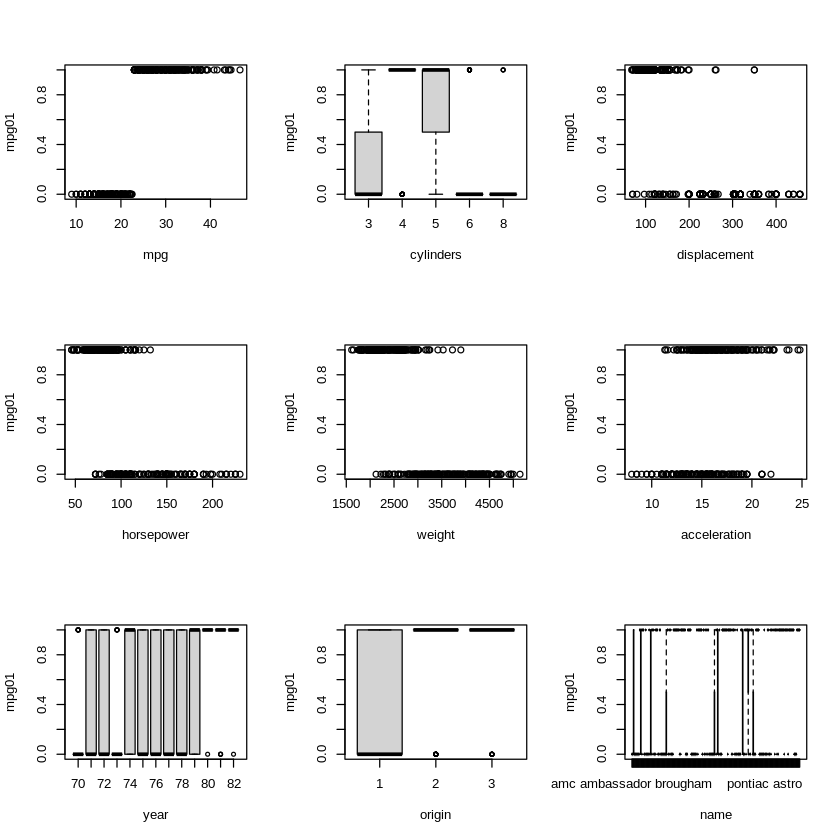

In [ ]:
par(mfrow=c(3,3))

for(i in names(d)) {
  if(i == "mpg01"){
    next
  }
  if (i == "name" | i == "origin" | i == "cylinders" | i == "year") {
    boxplot(d$mpg01 ~ d[[i]], data=d, ylab="mpg01", xlab=i)
  } else{
  plot(d$mpg01 ~ d[[i]], data=d, ylab="mpg01", xlab=i)
}
}

Most straightforwardly, all scatter-plotted variables (except maybe displacement) seem to have a clear relationship with `mpg01`.  However, we need to be careful in making this assessment.  The relationships shown here are *unconditional* while the methods we use to predict `mpg01` are largely *conditional*.  For example, the relationshipe with between `mpg01` and `cylinders` is pretty muddled and may seem not to exist in this 2-way relationship.  However, if we accounted for, say, `displacement`, we may find a strong relationship here.

##### Answer to c
***Split the data into a training set and a test set.***

In [ ]:
train_prop <- 0.75
train_n <- ceiling(nrow(d) * train_prop)
train_ind <- sample(x=1:nrow(d), size=train_n, replace=FALSE)

d_train <- d[train_ind,]
d_test <- d[-train_ind,]

In [ ]:
str(d_train)
str(d_test)

'data.frame':	294 obs. of  10 variables:
 $ mpg         : num  19.4 29.5 38.1 37.7 14 20.2 22 18 30 36.1 ...
 $ cylinders   : int  8 4 4 4 8 6 6 4 4 4 ...
 $ displacement: num  318 97 89 89 455 200 250 121 146 98 ...
 $ horsepower  : int  140 71 60 62 225 85 105 112 67 66 ...
 $ weight      : int  3735 1825 1968 2050 3086 2965 3353 2933 3250 1800 ...
 $ acceleration: num  13.2 12.2 18.8 17.3 10 15.8 14.5 14.5 21.8 14.4 ...
 $ year        : int  78 76 80 81 70 78 76 72 80 78 ...
 $ origin      : int  1 2 3 3 1 1 1 2 2 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 114 287 270 278 30 135 61 295 185 139 ...
 $ mpg01       : num  0 1 1 1 0 0 0 0 1 1 ...
 - attr(*, "na.action")= 'omit' Named int [1:5] 33 127 331 337 355
  ..- attr(*, "names")= chr [1:5] "33" "127" "331" "337" ...
'data.frame':	98 obs. of  10 variables:
 $ mpg         : num  15 27 26 26 27 28 19 19 14 18 ...
 $ cylinders   : int  8 4 4 4 4 4 6 6 8 6 ...
 $ displacement: num  383 97 97 121 97 140 23

##### Answer to d
***Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?***

I'll kinda obey the instructions here, but again, I struggle to justify using only the variables that appear associated with `mpg01` according to two-way visual assessment.  So I'll compromise my sticking to the numerical variables other than `mpg`.

In [ ]:
library(MASS)

lda.fit <- lda(mpg01 ~ displacement + horsepower + weight + acceleration, data=d_train)
lda.probs <- predict(lda.fit, newdata=d_test, type="response")
lda.predict <- ifelse(test = lda.probs[["posterior"]][,2] >= 0.5,
                      yes=1,
                      no=0)

(lda.confuse <- table("Prediction"=lda.predict, "Actual"=d_test$mpg01))
(lda.testErr <- round((sum(lda.confuse) - sum(diag(lda.confuse))) / sum(lda.confuse), 4))

          Actual
Prediction  0  1
         0 35  1
         1  4 58

[1] 0.051

##### Answer to e
***Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?***

In [ ]:
library(MASS)

qda.fit <- qda(mpg01 ~ displacement + horsepower + weight + acceleration, data=d_train)
qda.probs <- predict(qda.fit, newdata=d_test, type="response")
qda.predict <- ifelse(test = qda.probs[["posterior"]][,2] >= 0.5,
                      yes=1,
                      no=0)

(qda.confuse <- table("Prediction"=qda.predict, "Actual"=d_test$mpg01))
(qda.testErr <- round((sum(qda.confuse) - sum(diag(qda.confuse))) / sum(qda.confuse), 4))

          Actual
Prediction  0  1
         0 37  4
         1  2 55

[1] 0.0612

##### Answer to f
***Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?***

In [ ]:
logit.fit <- glm(mpg01 ~ displacement + horsepower + weight + acceleration, family=binomial, data=d_train)
logit.probs <- predict(logit.fit, newdata=d_test, type="response")
logit.predict <- ifelse(test = logit.probs >= 0.5,
                        yes=1,
                        no=0)

(logit.confuse <- table("Prediction"=logit.predict, "Actual"=d_test$mpg01))
(logit.testErr <- round((sum(logit.confuse) - sum(diag(logit.confuse))) / sum(logit.confuse), 4))

          Actual
Prediction  0  1
         0 37  7
         1  2 52

[1] 0.0918

##### Answer to g
***Perform naive Bayes on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?***

In [ ]:
#install.packages("e1071")
library(e1071)

nb.fit <- naiveBayes(mpg01 ~ displacement + horsepower + weight + acceleration, data=d_train)
nb.predict <- predict(nb.fit, newdata=d_test, type="class")

(nb.confuse <- table("Prediction"=nb.predict, "Actual"=d_test$mpg01))
(nb.testErr <- round((sum(nb.confuse) - sum(diag(nb.confuse))) / sum(nb.confuse), 4))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




          Actual
Prediction  0  1
         0 37  5
         1  2 54

[1] 0.0714

##### Answer to h
***Perform KNN on the training data, with several values of $K$, in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? Which value of $K$ seems to perform the best on this data set?***

In [ ]:
library(class)

knn1.predict <- knn(as.matrix(d_train$mpg01), as.matrix(d_test$mpg01), d_train$mpg01, k=1)
(knn1.confuse <- table("Prediction"=knn1.predict, "Actual"=d_test$mpg01))

knn3.predict <- knn(as.matrix(d_train$mpg01), as.matrix(d_test$mpg01), d_train$mpg01, k=3)
(knn3.confuse <- table("Prediction"=knn3.predict, "Actual"=d_test$mpg01))

knn10.predict <- knn(as.matrix(d_train$mpg01), as.matrix(d_test$mpg01), d_train$mpg01, k=10)
(knn10.confuse <- table("Prediction"=knn10.predict, "Actual"=d_test$mpg01))

          Actual
Prediction  0  1
         0 39  0
         1  0 59

          Actual
Prediction  0  1
         0 39  0
         1  0 59

          Actual
Prediction  0  1
         0 39  0
         1  0 59

### Question 15
This problem involves writing functions.

(a) Write a function, `Power()`, that prints out the result of raising 2 to the 3rd power. In other words, your function should compute 23 and print out the results.

*Hint: Recall that `x^a` raises `x` to the power `a`. Use the `print()` function to output the result.*

(b) Create a new function, `Power2()`, that allows you to pass any two numbers, `x` and `a`, and prints out the value of `x^a`. You can do this by beginning your function with the line
```
Power2 <- function (x, a) {
```
You should be able to call your function by entering, for instance,
```
Power2(3, 8)
```
on the command line. This should output the value of $3^8$, namely, 6, 561.

(c) Using the `Power2()` function that you just wrote, compute $10^3$, $8^{17}$, and $131^3$.

(d) Now create a new function, `Power3()`, that actually returns the result `x^a` as an R object, rather than simply printing it to the screen. That is, if you store the value `x^a` in an object called `result` within your function, then you can simply `return()` this result, using the following line:
```
return (result)
```
The line above should be the last line in your function, before the `}` symbol.

(e) Now using the `Power3()` function, create a plot of $f(x) = x^2$. The x-axis should display a range of integers from 1 to 10, and the y-axis should display $x^2$. Label the axes appropriately, and use an appropriate title for the figure. Consider displaying either the x-axis, the y-axis, or both on the log-scale. You can do this by using `log = "x"`, `log = "y"`, or `log = "xy"` as arguments to the `plot()` function.

(f) Create a function, `PlotPower()`, that allows you to create a plot of `x` against `x^a` for a fixed a and for a range of values of `x`. For instance, if you call
```
PlotPower(1:10, 3)
```
then a plot should be created with an x-axis taking on values 1, 2,..., 10, and a y-axis taking on values $1^3, 2^3,..., 10^3$.